# Met Data Processing
Final/Clean Version of MET_Data_Analysis_Raw.ipynb
by Bharat Sharma <br>
sharmabd@ornl.gov <br>
Site: US-DUKE



In [284]:
# importing libraries
import xarray as xr
import glob
from datetime import datetime
import cftime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Files
- **ELM-DUKE** : has the nc files that we use to run the current version of ELM-FATES <br>
- **[FACEMDS_Walker2018](https://data.ess-dive.lbl.gov/view/ess-dive-7807cf86f1dd42a-20181127T173047368940)** : Processed Data (My focus: DUKE) <br>
- **[DukeFACE_Oren2022](https://data.ess-dive.lbl.gov/view/doi:10.15485/1895465)**: Updated DUKE met Data


In [285]:
# paths

paths = {}
paths ["ELM-DUKE"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ELM_Data/data/atm/datm7/CLM1PT_data/1x1pt_US-DUK/"
paths ["FACEMDS_Walker2018"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Walker_2018_FATES_MDS/data/"
paths ["DukeFACE_Oren2022"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/"
paths ["Raleigh_Airport_Met"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/"
paths ["ERA5_Met"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ERA5_Duke_Met/"
paths ["NARR_Met"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/NARR_Met/"
paths ["AmeriFlux"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/AmeriFlux/"
paths ["Save_Processed"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_Met_Data_processed/"


## ELM Duke Data

In [286]:
key = "ELM-DUKE"
ds_elm_all= xr.open_mfdataset(glob.glob(f"{paths[key]}*.nc"))

In [287]:
#cftime to datetime 

def cftime_to_dtime (cftime_object):
    # Convert cftime.DatetimeNoLeap to datetime
    datetime_object = datetime(
        year=cftime_object.year,
        month=cftime_object.month,
        day=cftime_object.day,
        hour=cftime_object.hour,
        minute=cftime_object.minute,
        second=cftime_object.second,
        microsecond=cftime_object.microsecond,
    )
    return datetime_object

time_objects = [cftime_to_dtime (t) for t in ds_elm_all.time.values]
print (time_objects)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



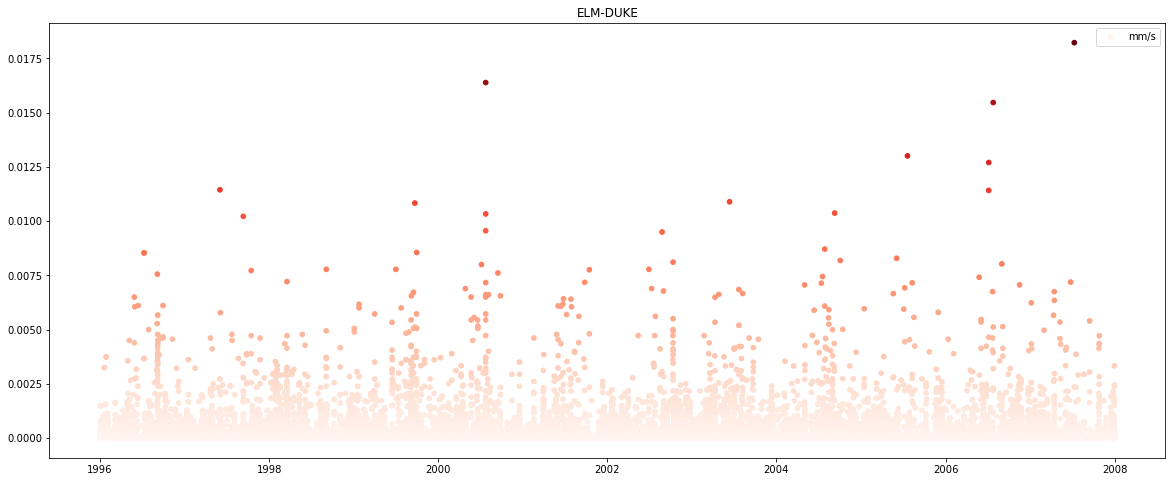

In [288]:
fig1 = plt.figure(figsize=(20,8))
plt.scatter(x= time_objects, y=ds_elm_all.PRECTmms, 
            c=ds_elm_all.PRECTmms, cmap='Reds', 
            s=22, marker = 'o',label = ds_elm_all.PRECTmms.units,
           )
plt.title(f"{key}")
plt.legend()

## Investigating FACEMDS_Walker2018

In [289]:
key = "FACEMDS_Walker2018"
ds_Walker_h= xr.open_dataset(f"{paths[key]}DUKE_forcing_h.nc", decode_times=False)

from datetime import datetime, timedelta

def seconds_to_datetime(seconds, reference_date):
    return reference_date + timedelta(seconds=seconds)

reference_date= datetime(1996, 1, 1, 0 , 0)

list_seconds = ds_Walker_h.TIME[...].values
list_seconds= np.asarray(list_seconds, dtype = float)
resulting_datetime = [seconds_to_datetime(seconds,reference_date) for seconds in list_seconds]


In [290]:
ds_Walker_h.nav_lon

<xarray.DataArray 'nav_lon' (x: 1)>
array([-79.0942], dtype=float32)
Dimensions without coordinates: x
Attributes:
    units:      degrees_east
    long_name:  Longitude

/Users/ud4/opt/anaconda3/envs/pyces/lib/python3.9/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


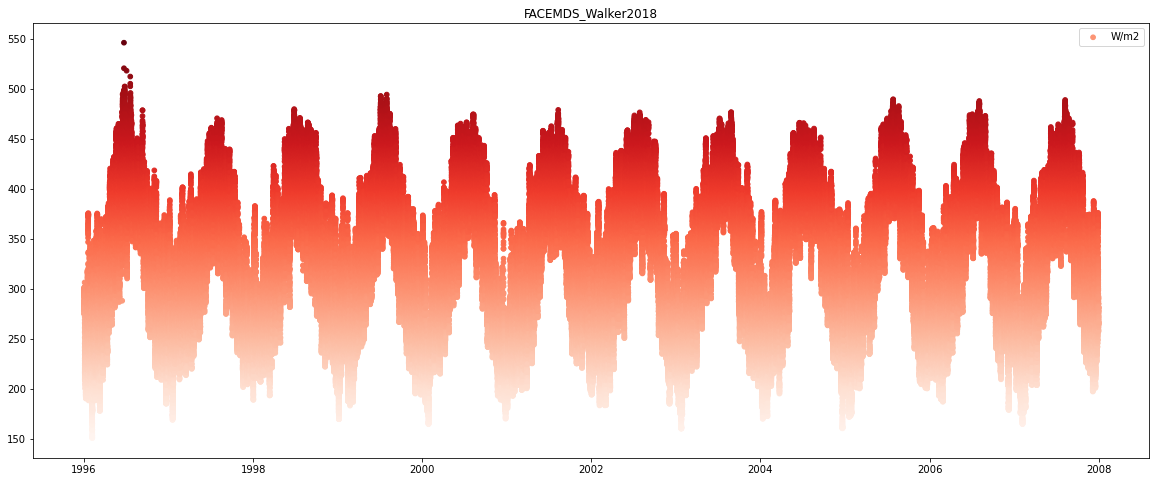

In [291]:
fig2 = plt.figure(figsize=(20,8))
plt.scatter(x= resulting_datetime, y=ds_Walker_h['LWdown'], 
            c=ds_Walker_h['LWdown'], cmap='Reds', 
            s=22, marker = 'o',label = ds_Walker_h['LWdown'].units
           )
plt.title(f"{key}")
plt.legend()

### FACEMDS_Walker CSV files

In [292]:
key = "FACEMDS_Walker2018"

#### Reading Hourly files

In [293]:
df_FACEMDS = {}
df_FACEMDS ['h'] = pd.read_csv(glob.glob(f"{paths[key]}DUKE*_h.txt")[0], delimiter= '\t')
print(len(df_FACEMDS ['h'] .columns))
df_FACEMDS ['h'] .columns

30


/Users/ud4/opt/anaconda3/envs/pyces/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['YEAR', 'DTIME', 'DOY', 'HRMIN', 'Rainf', 'Rainf_f ', 'Tair', 'Tair_f',
       'RH', 'RH_f', 'VPD', 'VPD_f', 'Qair', 'Qair_f', 'Wind', 'Wind_f',
       'SWdown', 'SWdown_f', 'PAR', 'PAR_f', 'LWdown', 'LWdown_f', 'PSurf',
       'PSurf_f', 'aCO2', 'eCO2', 'aO3', 'eO3', 'Ndep', 'SolarElevation'],
      dtype='object')

In [294]:
df_FACEMDS ['h']

,YEAR,DTIME,DOY,HRMIN,Rainf,Rainf_f,Tair,Tair_f,RH,RH_f,...,LWdown,LWdown_f,PSurf,PSurf_f,aCO2,eCO2,aO3,eO3,Ndep,SolarElevation
0,YEAR,DTIME,DOY,HRMIN,kg/m2/s,---,K,---,%,---,...,W/m2,---,Pa,---,ppmv,ppmv,ppbv,ppbv,g/m2/30-minutes,degree
1,1996,1.010417,1,15,2.800000e-05,0,2.820500e+02,0,1.000000e+02,0,...,2.972362e+02,1,1.013331e+05,4,3.747482e+02,3.747482e+02,-9.999000e+03,-9.999000e+03,7.798270e-05,-7.697134e+01
2,1996,1.031250,1,45,2.800000e-05,0,2.817500e+02,0,1.000000e+02,0,...,2.951620e+02,1,1.013152e+05,4,3.747482e+02,3.747482e+02,-9.999000e+03,-9.999000e+03,7.798270e-05,-7.595279e+01
3,1996,1.052083,1,115,2.800000e-05,0,2.814500e+02,0,1.000000e+02,0,...,2.930988e+02,1,1.014300e+05,4,3.747482e+02,3.747482e+02,-9.999000e+03,-9.999000e+03,7.798270e-05,-7.241380e+01
4,1996,1.072917,1,145,2.800000e-05,0,2.814500e+02,0,1.000000e+02,0,...,2.930988e+02,1,1.014466e+05,4,3.747482e+02,3.747482e+02,-9.999000e+03,-9.999000e+03,7.798270e-05,-6.752518e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210380,2007,365.90625,365,2145,0.0,0,278.982,0,73.887,0,...,264.8422,1,102395.0,4,400.9378,548.8154,-9999.0,-9999.0,0.000078,-54.26078
210381,2007,365.927063,365,2215,0.0,0,278.929,0,73.812,0,...,264.471,1,101508.7,4,400.9378,548.8154,-9999.0,-9999.0,0.000078,-60.15933
210382,2007,365.947906,365,2245,0.0,0,278.974,0,72.925,0,...,264.2967,1,101543.8,4,400.9378,548.8154,-9999.0,-9999.0,0.000078,-65.81711
210383,2007,365.96875,365,2315,0.0,0,279.181,0,73.575,0,...,265.9336,1,101597.7,4,400.9378,548.8154,-9999.0,-9999.0,0.000078,-70.98035


## Oren New Met Data

In [295]:
# Dictionary that will contain the dataframes of all the variables from Oren New Met Data
dict_dfs_common = {}

In [296]:
# Specify the file path
DuplicateDataFilename = 'DuplicateDukeData.txt'
# This file path is to document the duplicate Data in Duke Data

#Saving the time period of data availability of Duke data
First_Available_date = {}
Last_Available_date = {}

### AT : Tair
Oren Data has 3 dirs for AT for different plots, time periods, and sensors. <br>
I intend to use `*_gl.csv` files; i believe these are gap filled. <br>
I will save the mean of the plots for FACEMDS <br>
The common sensor data will be used among all the files.

In [297]:
key = "DukeFACE_Oren2022"
var_key = "AT"
face_var_key = "Tair"

plots_cols = ['R1uat', 'R2uat', 'R3uat', 'R4uat','R5uat', 'R6uat', 'R7uat', 'R8uat']

In [298]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{var_key}*/*_gf.csv"))

# Define a custom sorting key function to extract the year from the file path
def extract_year(filepath):
    return int(filepath.split(f'{var_key}')[-1][:4]) # Year

# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)


In [299]:
# Create a common dataframe
# List of column names
#common_columns = ['Year', 'JDT', 'DOY', 'Time', f'{face_var_key}']
common_columns = ['Year',  'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    duplicate_data.write(f"\n")
    df_tmp_common_gf = df_tmp_common_gf.reset_index(drop=True)
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf
First_Available_date[f"{face_var_key}"] = df_tmp_common_gf.iloc[0]
Last_Available_date [f"{face_var_key}"] = df_tmp_common_gf.iloc[-1]


In [300]:
 df_tmp_common_gf.iloc[-1]


Year    2012
DOY      366
Time    2400
Tair    7.44
Name: 274525, dtype: object

In [301]:
file = sorted_filepaths[0]
df_tmp = pd.read_csv(file)

In [302]:
# Fix of the times error in the Year of 1999 in the variables ['SLT','VPD', 'SVP']
times_1999 = np.array(df_tmp_common_gf[df_tmp_common_gf.Year ==1999]['Time'])
times_1999

array([30, 100, 130, ..., 2300, 2330, 2400], dtype=object)

### Precip : Rainf
units: mm (in 30 mins)

In [303]:
key = "DukeFACE_Oren2022"
var_key = "Precip"
face_var_key = "Rainf"

plots_cols = ['FACE.PO']

In [304]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{var_key}*/*_gf.csv"))

# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)

# Create a common dataframe
# List of column names
common_columns = ['Year', 'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    duplicate_data.write(f"\n")
    df_tmp_common_gf = df_tmp_common_gf.reset_index(drop=True)
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf
First_Available_date[f"{face_var_key}"] = df_tmp_common_gf.iloc[0]
Last_Available_date [f"{face_var_key}"] = df_tmp_common_gf.iloc[-1]




In [309]:
df_tmp_common_gf[(df_tmp_common_gf.Year==2010) & (df_tmp_common_gf.DOY==17)]

,Year,DOY,Time,Rainf
222672,2010,17,30,0.08
222673,2010,17,100,0.16
222674,2010,17,130,0.08
222675,2010,17,200,0.71
222676,2010,17,230,0.24
222677,2010,17,300,1.02
222678,2010,17,330,2.99
222679,2010,17,400,2.29
222680,2010,17,430,2.44
222681,2010,17,500,2.60


### RH : RH
Relative Humidity

In [187]:
key = "DukeFACE_Oren2022"
var_key = "RH"
face_var_key = "RH"
plots_cols = ['R1urh', 'R2urh', 'R3urh', 'R4urh','R5urh', 'R6urh', 'R7urh', 'R8urh']

In [188]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{var_key}*/*_gf.csv"))

# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)

# Create a common dataframe
# List of column names
common_columns = ['Year',  'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    duplicate_data.write(f"\n")
    df_tmp_common_gf = df_tmp_common_gf.reset_index(drop=True)
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf
First_Available_date[f"{face_var_key}"] = df_tmp_common_gf.iloc[0]
Last_Available_date [f"{face_var_key}"] = df_tmp_common_gf.iloc[-1]




### SM:SM 
(not in existing WalkerFACEMDS Data)<br>
Soil moisture integrates measurements from 0 to 30cm depth 

In [189]:
key = "DukeFACE_Oren2022"
var_key = "SM"
face_var_key = "SM"

plots_cols = ['R1tdr', 'R2tdr', 'R3tdr', 'R4tdr','R5tdr', 'R6tdr', 'R7tdr', 'R8tdr']

In [190]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{var_key}*/*_gf.csv"))

# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)

# Create a common dataframe
# List of column names
common_columns = ['Year',  'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    duplicate_data.write(f"\n")
    df_tmp_common_gf = df_tmp_common_gf.reset_index(drop=True)
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf
First_Available_date[f"{face_var_key}"] = df_tmp_common_gf.iloc[0]
Last_Available_date [f"{face_var_key}"] = df_tmp_common_gf.iloc[-1]




### SWP: SWP 
not in existing Walker 2018 <br>
(Soil water potential) <br>
from 2007 to 2012

In [191]:
key = "DukeFACE_Oren2022"
var_key = "SWP"
face_var_key = "SWP"
plots_cols = ['R1swp', 'R2swp', 'R3swp', 'R4swp','R5swp', 'R6swp']

In [192]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{var_key}*/*_gf.csv"))

# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)

# Create a common dataframe
# List of column names
common_columns = ['Year',  'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    duplicate_data.write(f"\n")
    df_tmp_common_gf = df_tmp_common_gf.reset_index(drop=True)
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf
First_Available_date[f"{face_var_key}"] = df_tmp_common_gf.iloc[0]
Last_Available_date [f"{face_var_key}"] = df_tmp_common_gf.iloc[-1]




### SVP: SVP

Saturated Vapor Pressure; Not in Walker 2018<br>
units kPa   

In [193]:
key = "DukeFACE_Oren2022"
var_key = "SVP"
face_var_key = "SVP"
plots_cols = ['R1usvp', 'R2usvp', 'R3usvp', 'R4usvp','R5usvp', 'R6usvp', 'R7usvp', 'R8usvp']


In [194]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{var_key}*/*_gf.csv"))

# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)

# Create a common dataframe
# List of column names
common_columns = ['Year',  'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    duplicate_data.write(f"\n")
    # Fixing the times error in the given Dataset
    df_tmp_common_gf.loc[df_tmp_common_gf['Year'] == 1999, 'Time'] = times_1999
    df_tmp_common_gf = df_tmp_common_gf.reset_index(drop=True)
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf
First_Available_date[f"{face_var_key}"] = df_tmp_common_gf.iloc[0]
Last_Available_date [f"{face_var_key}"] = df_tmp_common_gf.iloc[-1]




### VPD: VPD
Vapor pressure deficit <br>
Units kPa <br>

In [195]:
key = "DukeFACE_Oren2022"
var_key = "VPD"
face_var_key = "VPD"
plots_cols = ['R1uvpd', 'R2uvpd', 'R3uvpd', 'R4uvpd','R5uvpd', 'R6uvpd', 'R7uvpd', 'R8uvpd']

In [196]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{var_key}*/*_gf.csv"))

# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)

# Create a common dataframe
# List of column names
common_columns = ['Year',  'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    duplicate_data.write(f"\n")
    # Fixing the times error in the given Dataset
    df_tmp_common_gf.loc[df_tmp_common_gf['Year'] == 1999, 'Time'] = times_1999
    df_tmp_common_gf = df_tmp_common_gf.reset_index(drop=True)
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf
First_Available_date[f"{face_var_key}"] = df_tmp_common_gf.iloc[0]
Last_Available_date [f"{face_var_key}"] = df_tmp_common_gf.iloc[-1]




### SLT: SLT

Walker 2018 does not have this data <br>
soil temperature from plots 1-6, one sensor per plot at 15 cm depth, measured in Degree Celsius. <br>
I will be averaging over plots 2-6 because 1 was upgraded over time and 15 cm depth was not avaiable later 

In [197]:
key = "DukeFACE_Oren2022"
var_key = "SLT"
face_var_key = "SLT"
plots_cols = ['R2slt', 'R3slt', 'R4slt','R5slt', 'R6slt']

In [198]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{var_key}*/*_gf.csv"))

# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)

# Create a common dataframe
# List of column names
common_columns = ['Year',  'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    duplicate_data.write(f"\n")
    # Fixing the times error in the given Dataset
    df_tmp_common_gf.loc[df_tmp_common_gf['Year'] == 1999, 'Time'] = times_1999
    df_tmp_common_gf = df_tmp_common_gf.reset_index(drop=True)
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf
First_Available_date[f"{face_var_key}"] = df_tmp_common_gf.iloc[0]
Last_Available_date [f"{face_var_key}"] = df_tmp_common_gf.iloc[-1]

### PAR: PAR

The data from 2008-12 was averaged to get PAN and Rn <br>
PAR - Photosynthetically active radiation, umol/m^2\*s <br>
PAR had values from only one plot for 1997-2007 and from two plots for 2008-2012, which were averaged <br> 

In [199]:
key = "DukeFACE_Oren2022"
var_key = "PAR"
face_var_key = "PAR"
plots_cols = ['PAR']

exp_filename = "Rad" # Exception in the filename

In [200]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{exp_filename}*/*_gf.csv"))

# Define a custom sorting key function to extract the year from the file path
def extract_year(filepath):
    return int(filepath.split(f'{exp_filename}')[-1][:4]) # Year
    
# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)

# Create a common dataframe
# List of column names
common_columns = ['Year',  'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    duplicate_data.write(f"\n")
    df_tmp_common_gf = df_tmp_common_gf.reset_index(drop=True)
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf
First_Available_date[f"{face_var_key}"] = df_tmp_common_gf.iloc[0]
Last_Available_date [f"{face_var_key}"] = df_tmp_common_gf.iloc[-1]

### Rn: Rn 

Not in Walker 2018 <br>
The data from 2008-12 was averaged to get PAN and Rn <br>
Rn  - Net radiation. Q7 sensor before 2004, CNR1 thereafter, W/m^2  <br>
Rn had values from only one plot for 1997-2007 and from two plots for 2008-2012, which were averaged <br> 

In [201]:
key = "DukeFACE_Oren2022"
var_key = "Rn"
face_var_key = "Rn"
plots_cols = ['Rn']

exp_filename = "Rad" # Exception in the filename

In [202]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{exp_filename}*/*_gf.csv"))

# Define a custom sorting key function to extract the year from the file path
def extract_year(filepath):
    return int(filepath.split(f'{exp_filename}')[-1][:4]) # Year
    
# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)

# Create a common dataframe
# List of column names
common_columns = ['Year',  'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    duplicate_data.write(f"\n")
    df_tmp_common_gf = df_tmp_common_gf.reset_index(drop=True)
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf
First_Available_date[f"{face_var_key}"] = df_tmp_common_gf.iloc[0]
Last_Available_date [f"{face_var_key}"] = df_tmp_common_gf.iloc[-1]

In [203]:
dict_dfs_common['PAR']

,Year,DOY,Time,PAR
0,1997,1,30,0.0
1,1997,1,100,0.0
2,1997,1,130,0.0
3,1997,1,200,0.0
4,1997,1,230,0.0
...,...,...,...,...
280507,2012,366,2200,0.0
280508,2012,366,2230,0.0
280509,2012,366,2300,0.0
280510,2012,366,2330,0.0


### PAR: PAR (Modified)
Saving the existing PAR in a new variable 'PAR_ori'. <br>
Correcting existing values of PAR that reduce over time because of the degrading sensor <br>


In [204]:
dict_dfs_common['PAR_ori'] = dict_dfs_common['PAR']
dict_dfs_common['PAR_ori']['PAR_ori'] = dict_dfs_common['PAR_ori']['PAR']
dict_dfs_common['PAR_ori'] = dict_dfs_common['PAR_ori'].drop(['PAR'], axis=1)
dict_dfs_common['PAR_ori']

,Year,DOY,Time,PAR_ori
0,1997,1,30,0.0
1,1997,1,100,0.0
2,1997,1,130,0.0
3,1997,1,200,0.0
4,1997,1,230,0.0
...,...,...,...,...
280507,2012,366,2200,0.0
280508,2012,366,2230,0.0
280509,2012,366,2300,0.0
280510,2012,366,2330,0.0


In [205]:
import seaborn as sns
from PIL import Image, ImageDraw

iter = 16

palette = list(reversed(sns.color_palette("Spectral_r", iter).as_hex()))
print(palette)

width_px=1000
new = Image.new(mode="RGB", size=(width_px,120))

for i in range(iter):

    newt = Image.new(mode="RGB", size=(width_px//iter,100), color=palette[i])
    new.paste(newt, (i*width_px//iter,10))

['#be254a', '#da464d', '#ed6246', '#f7844e', '#fcaa5f', '#fec877', '#fee491', '#fff6b0', '#f8fcb4', '#e9f69d', '#caea9e', '#a7dba4', '#7ecca5', '#5ab4ab', '#3b92b9', '#4471b2']


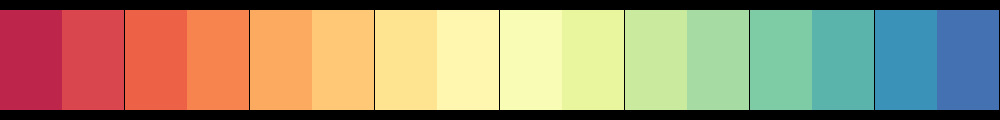

In [206]:
new

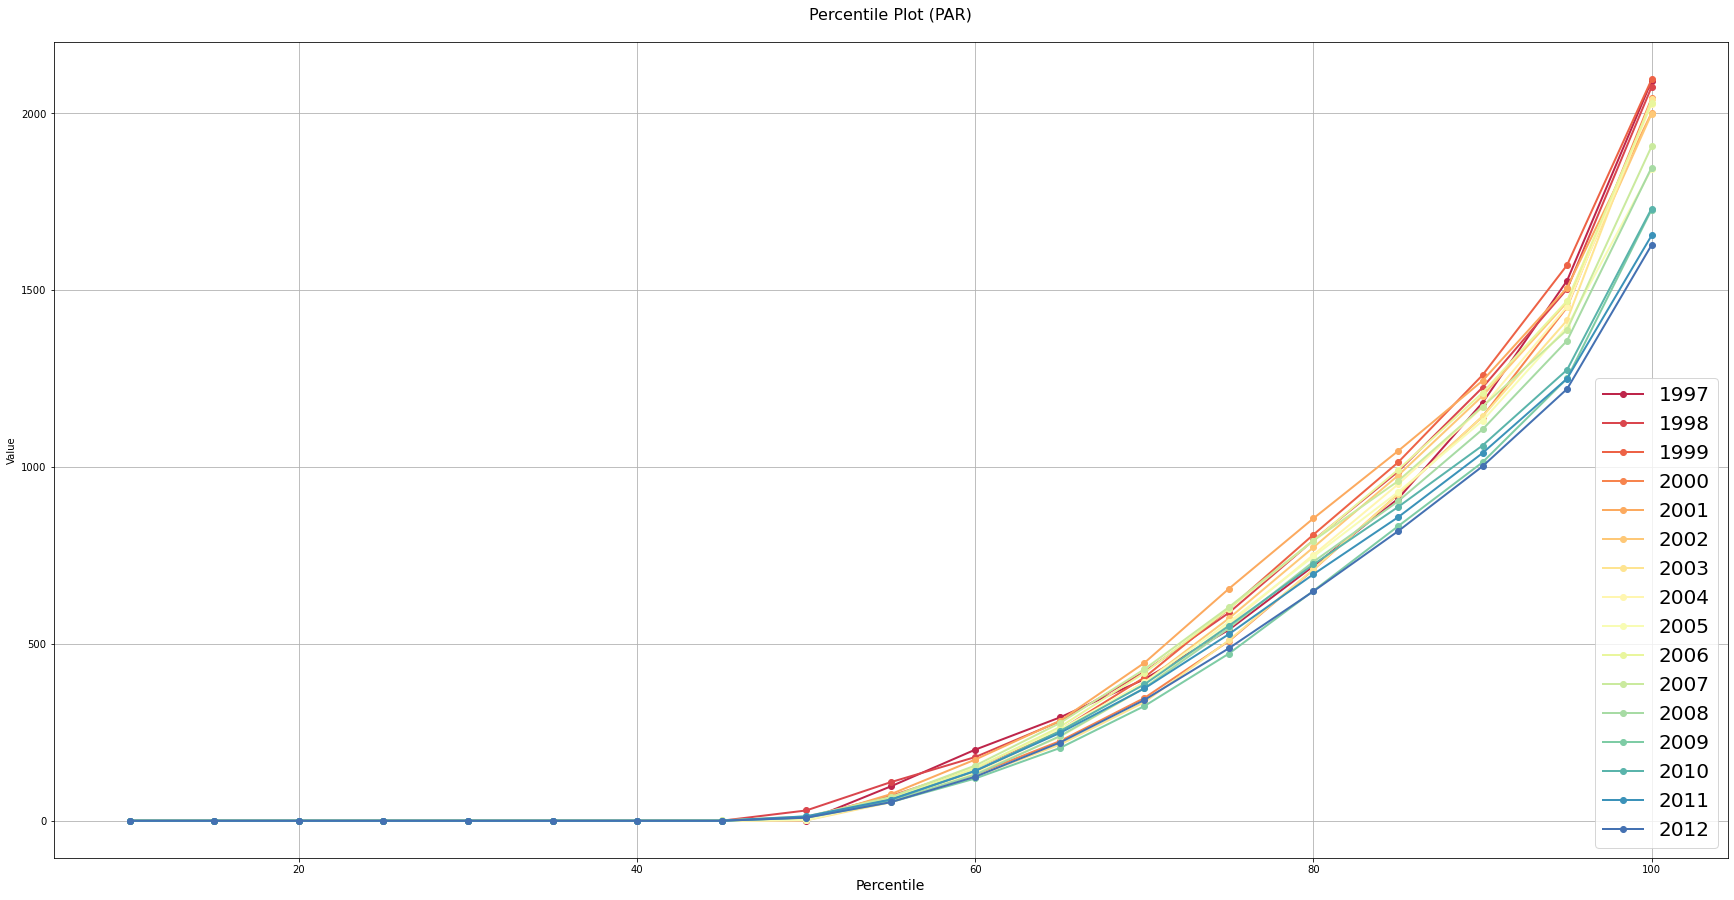

In [207]:
plt.figure(figsize=(30, 15))

color_list = ['#be254a', '#da464d', '#ed6246', '#f7844e', '#fcaa5f', '#fec877', '#fee491', '#fff6b0', '#f8fcb4', '#e9f69d', '#caea9e', '#a7dba4', '#7ecca5', '#5ab4ab', '#3b92b9', '#4471b2']
per_95 = []
per_90 = []
per_60 = []
i=0
for lbl,gr in dict_dfs_common['PAR'].groupby(['Year']):
    # Calculate percentiles (10th, 20th, 30th, ..., 100th)
    percentiles = np.arange(10, 101, 5)
    percentile_values = np.percentile(gr['PAR'], percentiles)
    per_95.append((int(lbl), percentile_values[-2])) 
    per_90.append((int(lbl), percentile_values[-3])) 
    per_60.append((int(lbl), percentile_values[10]))
    # Plot percentiles
    plt.plot(percentiles[:], percentile_values[:], marker='o', linestyle='-', c = color_list[i], lw=2,label = f'{int(lbl)}')
    plt.title('Percentile Plot (PAR)\n', fontsize=16)
    plt.xlabel('Percentile',fontsize=14)
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend(loc=4, fontsize=20)
    i=i+1
    #plt.show()

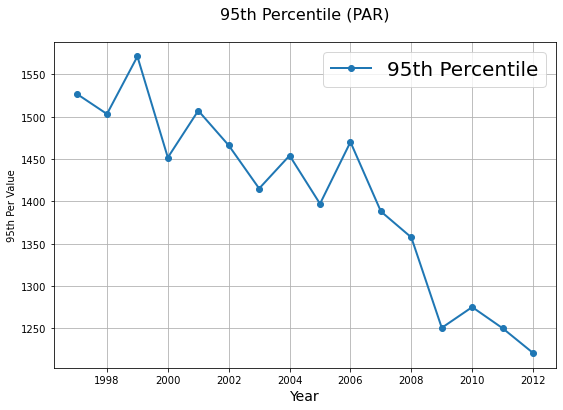

In [208]:
# Plot percentiles
if True:
    plt.figure(figsize=(9, 6))
    plt.plot(np.array(per_95)[:,0], np.array(per_95)[:,1], marker='o', linestyle='-',  lw=2,label = f'95th Percentile')
    plt.title('95th Percentile (PAR)\n', fontsize=16)
    plt.xlabel('Year',fontsize=14)
    plt.ylabel('95th Per Value')
    plt.grid(True)
    plt.legend(loc=1, fontsize=20)

In [209]:
# Normalizing based on the 95th percent value
# Assuming that the sensor was good in the first 3 years
# Taking the average for first 3 years.
df_par_per = pd.DataFrame(data= np.array(per_95)[:,1], columns=['PAR_95p'])
df_par_per.index = np.asarray(np.array(per_95)[:,0], dtype=int)
df_par_per.index.name = 'Year'
base_95th = df_par_per.iloc[0:3].mean()

# Factor Reduction in amplitude
df_par_div_factor = df_par_per/base_95th

df_par_div_factor.columns = ['PAR_divisible_factor']
# we need to divide the original data with the factor corresponding the year of above array.


In [210]:
# Merge the original DataFrame with the factors DataFrame based on the 'Year' column
merged_df = dict_dfs_common['PAR'].merge(df_par_div_factor, on='Year', how='left')

# Calculate the modified 'PAR' column by dividing 'PAR' with 'PAR_95p'
merged_df['Modified_PAR'] = merged_df['PAR'] / merged_df['PAR_divisible_factor']


In [211]:
# Replacing the original PAR with new PAR values
merged_df['PAR'] = merged_df['Modified_PAR']
merged_df = merged_df.drop(['Modified_PAR', 'PAR_divisible_factor','PAR_ori'], axis=1)
dict_dfs_common['PAR'] = merged_df


In [212]:
dict_dfs_common['PAR']

,Year,DOY,Time,PAR
0,1997,1,30,0.0
1,1997,1,100,0.0
2,1997,1,130,0.0
3,1997,1,200,0.0
4,1997,1,230,0.0
...,...,...,...,...
280507,2012,366,2200,0.0
280508,2012,366,2230,0.0
280509,2012,366,2300,0.0
280510,2012,366,2330,0.0


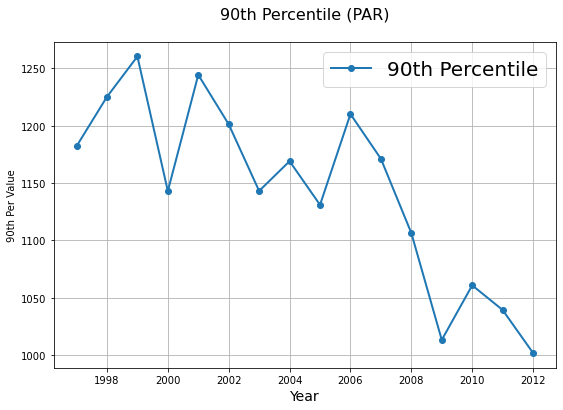

In [213]:
# Plot percentiles (Other options)
if True:
    plt.figure(figsize=(9, 6))
    plt.plot(np.array(per_90)[:,0], np.array(per_90)[:,1], marker='o', linestyle='-',  lw=2,label = f'90th Percentile')
    plt.title('90th Percentile (PAR)\n', fontsize=16)
    plt.xlabel('Year',fontsize=14)
    plt.ylabel('90th Per Value')
    plt.grid(True)
    plt.legend(loc=1, fontsize=20)

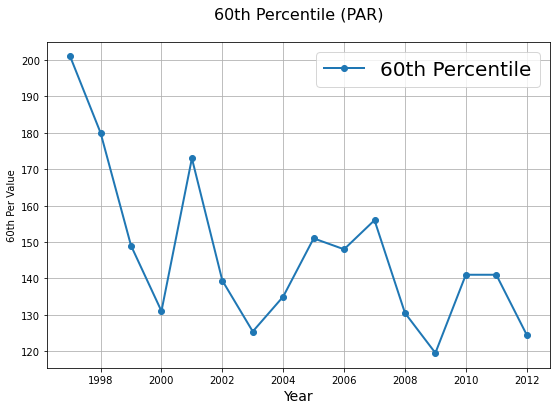

In [214]:
# Plot percentiles
if True:
    plt.figure(figsize=(9, 6))
    plt.plot(np.array(per_60)[:,0], np.array(per_60)[:,1], marker='o', linestyle='-',  lw=2,label = f'60th Percentile')
    plt.title('60th Percentile (PAR)\n', fontsize=16)
    plt.xlabel('Year',fontsize=14)
    plt.ylabel('60th Per Value')
    plt.grid(True)
    plt.legend(loc=1, fontsize=20)

### SWdown: SWdown 

Calculating it from PAR using the following function: <br>
Using the corrected par (umolm-2s-1) we calculate SWDown in (W/m2) <br>

In [215]:
def PAR2SWdown (data, out_units='umolm-2s-1'):
    """
    by BS
    
    input units: umolm-2s-1
    -----------------------
    
    Returns:
    --------
    PAR in desired out_units.
    
    Source: https://www.researchgate.net/post/Can-I-convert-PAR-photo-active-radiation-value-of-micro-mole-M2-S-to-Solar-radiation-in-Watt-m2/59ca6422217e201e2b23415f/citation/download
    It says PAR is 45% of total Solar radiation. However, most models use a factor of 0.5 or 50%. We will go with 0.5. 
    And 1 W/m2 ≈ 4.6 μmole/m2/s 
    
    """
    if out_units == 'umolm-2s-1':
        conversion_factor = 2 # (1/0.5)
    if out_units == 'W/m2':
        conversion_factor = 2/4.6 # (1/0.5/4.6)
        
    return data*conversion_factor
    

In [216]:
df_swdown = dict_dfs_common['PAR'].copy(deep=True)
df_swdown['SWdown']=df_swdown['PAR'].apply(lambda x: PAR2SWdown(x,'W/m2'))
df_swdown = df_swdown.drop('PAR',axis=1)
dict_dfs_common['SWdown'] = df_swdown

In [217]:
del dict_dfs_common['PAR_ori']
dict_dfs_common.keys()

dict_keys(['Tair', 'Rainf', 'RH', 'SM', 'SWP', 'SVP', 'VPD', 'SLT', 'PAR', 'Rn', 'SWdown'])

### LWdown

Calculating it from Tair and VPD using the following function: <br>
Based on https://github.com/fluxnet/ONEFlux/blob/9201beb15e6eca57bd6fd23a16cb5e46d4e2de7a/oneflux_steps/qc_auto/src/main.c#L2851-L2882 <br>
Use the function LWDown_oneflux to get LWDown in W/m2  <br>


#### LWDown Method 1 : Bai 

In [218]:
# Method 1
import math
def sat_vap(temp):
    # temp should have a unit of Deg C and svp will have a unit of kPa
    exponent = (17.502 * temp) / (240.97 + temp)
    svp = (0.61121 * math.exp(exponent))
    return svp

def lw_bai(svp,temp,rh):
    # temp should be K
    """
    This formula fails when the Temperature is < 0C or < 273.15K. It generates Complex numbers as solutions
    """
    temp = temp+273.15
    try:
        lw_bai = 1.31 * (svp*(temp - 273.15) * rh / temp / 10.0) ** (1.0 / 7.0) * 5.67 * (temp / 100.0) ** 4.0
    except:
        lw_bai = -6999.0
    
    return round(lw_bai)

#### LWDown Method 2 : Ni An 2017 

In [219]:

# Method 2
# Ta in C; RH in %, es is SVP in kPa at Ta
import math
def sat_vap_NiAn(temp):
    # temp should have a unit of Deg C and svp will have a unit of kPa
    exponent = (17.269 * temp) / (273.1 + temp)
    svp = (0.6107 * math.exp(exponent))
    return svp

def lw_2 (Ta, RH): 
    #paper Ni An 2017
    # https://www.sciencedirect.com/science/article/pii/S1674775516300944#sec2
    es = sat_vap_NiAn(Ta)
    #print (es)
    ea = RH*es/100
    epsa = 0.7 + 5.95*10**(-4)*ea* math.exp(1500/(Ta+273.1))
    sigma = 5.67 * 10**(-8) # W/(m2 K4)
    Ts= Ta+273.15
    lw = epsa *sigma *(Ts**4)
    return lw


#### LWDown Method 3 : OneFlux (Using)

In [220]:
#Method 3
def LWDown_oneflux (Ta, vpd): 
    """
    The formula is similar to the one used in OneFlux code
    Ta in C
    VPD in kPa
    
    Based on https://github.com/fluxnet/ONEFlux/blob/9201beb15e6eca57bd6fd23a16cb5e46d4e2de7a/oneflux_steps/qc_auto/src/main.c#L2851-L2882
    
    e.g. 
    df_temp['LWDown'] = df_temp.apply(lambda row: lw_3(row['Tair'], row['VPD']), axis=1)
    where df_temp is a pandas dataframe with columns of Tair in C and VPD in kPa.
    """
    
    
    T0 = 273.15
    Tstroke = 36
    A = 17.27
    ESTAR = 611
    Ts= Ta+T0
    
    esat = ESTAR * math.exp(A*((Ta/(Ts-Tstroke)))) 
                            
    vp = esat - (vpd * 100)
    if vp <0.0:
        vp = 3.3546e-004
    epsa = 0.64 * math.pow(vp/Ts,0.14285714) # ...
    sigma = 5.669e-8 # W/(m2 K4) #..
     #..
    lw = epsa *sigma *(Ts**4) #..
    return lw

In [221]:
df_temp = dict_dfs_common['Tair'].copy(deep=True)

# Apply the sat_vap function to create a new column 'SVP'(saturated vapor pressure) in the DataFrame
df_temp['SVP'] = df_temp['Tair'].apply(lambda x: sat_vap(x))

In [222]:
df_temp = dict_dfs_common['Tair'].copy(deep=True)
df_temp['VPD'] = dict_dfs_common["VPD"]["VPD"]
# Apply the lw_3 function to create a new column 'LWDown' in the DataFrame
df_temp['LWdown'] = df_temp.apply(lambda row: LWDown_oneflux(row['Tair'], row['VPD']), axis=1)
df_temp

,Year,DOY,Time,Tair,VPD,LWdown
0,1997,125,1730,21.50,1.47,369.459178
1,1997,125,1800,20.41,1.22,361.096455
2,1997,125,1830,18.89,0.96,349.556857
3,1997,125,1900,17.91,0.99,341.820331
4,1997,125,1930,16.61,0.90,332.075109
...,...,...,...,...,...,...
274521,2012,366,2200,7.58,0.56,269.683969
274522,2012,366,2230,7.08,0.52,266.612588
274523,2012,366,2300,6.88,0.50,265.409721
274524,2012,366,2330,7.17,0.52,267.191471


In [223]:
# Computing the dataframe for LWdown
df_lwdown = df_temp.drop(['Tair','VPD'], axis =1)
# Saving the LWdown in the main dataframe
dict_dfs_common['LWdown'] = df_lwdown


In [224]:
dict_dfs_common.keys()

dict_keys(['Tair', 'Rainf', 'RH', 'SM', 'SWP', 'SVP', 'VPD', 'SLT', 'PAR', 'Rn', 'SWdown', 'LWdown'])

## Pressure and Wind - Raleigh
Source: https://www.ncei.noaa.gov/access/search/data-search/local-climatological-data?dataTypes=HourlySeaLevelPressure&dataTypes=HourlyStationPressure&dataTypes=HourlyWindDirection&dataTypes=HourlyWindSpeed&pageNum=2&startDate=1996-01-01T00:00:00&endDate=2013-01-01T23:59:59&bbox=36.133,-79.020,35.828,-78.714 <br>
`RALEIGH_AIRPORT_Wind_Pressure.csv` <br>


In [225]:
df = pd.read_csv(paths ["Raleigh_Airport_Met"] + 'RALEIGH_AIRPORT_Wind_Pressure.csv')
df

/Users/ud4/opt/anaconda3/envs/pyces/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,STATION,DATE,REPORT_TYPE,SOURCE,HourlySeaLevelPressure,HourlyStationPressure,HourlyWindDirection,HourlyWindSpeed
0,72306013722,1996-01-01T00:00:00,SAO,3,29.84,29.36,120,3.0
1,72306013722,1996-01-01T01:00:00,SY-SA,3,29.83,29.36,000,0.0
2,72306013722,1996-01-01T02:00:00,SAO,3,29.82,29.35,000,0.0
3,72306013722,1996-01-01T02:28:00,SAOSP,4,NaN,29.35,140,3.0
4,72306013722,1996-01-01T03:00:00,SAO,3,29.82,29.34,000,0.0
...,...,...,...,...,...,...,...,...
254834,72306013722,2013-01-01T21:51:00,FM-15,7,29.99,29.52,000,0.0
254835,72306013722,2013-01-01T22:49:00,FM-16,6,NaN,29.51,000,0.0
254836,72306013722,2013-01-01T22:51:00,FM-15,7,29.97,29.50,000,0.0
254837,72306013722,2013-01-01T23:51:00,FM-15,7,29.97,29.50,000,0.0


In [226]:
def inch_mercury_to_pascal(inch_mercury):
    """
    Convert inches of mercury (inHg) to pascals (Pa).

    :param inch_mercury: Value in inches of mercury
    :return: Value in pascals
    """
    # Conversion factor: 1 inHg = 3386.39 Pa
    pascal = inch_mercury * 3386.39
    return pascal


In [227]:
# Converting the units of pressure from inchHG to Pa
df['Psurf_SL'] = df['HourlySeaLevelPressure'].apply(lambda x: inch_mercury_to_pascal(x))
df['Psurf_St'] = df['HourlyStationPressure'].apply(lambda x: inch_mercury_to_pascal(x))
df['Datetime'] = pd.to_datetime(df['DATE'])

# Subsetting the DataFrame that we need
df_PW = df[['Datetime', 'Psurf_SL','HourlyWindSpeed']]
df_PW['Wind'] = df_PW['HourlyWindSpeed']
df_PW = df_PW.drop('HourlyWindSpeed', axis=1)

# Resampling the dataframe to 30 mins timestep
# Convert 'Datetime' column to datetime type and set it as the index
df_PW['Datetime'] = pd.to_datetime(df_PW['Datetime'])
df_PW.set_index('Datetime', inplace=True)

# Remove duplicate index values
df_PW = df_PW[~df_PW.index.duplicated(keep='first')]

# Resample to 30-minute intervals and fill missing/Nan values with forward-fill
df_PW_resampled = df_PW.resample('30T').ffill()

# Interpolate NaN values using linear interpolation
df_PW_resampled.interpolate(method='linear', inplace=True)

# Replacing very high values (1000 m/s) of Wind with 0
df_PW_resampled['Wind'][df_PW_resampled['Wind'] > 1000] = 0

# Reset the index to have 'Datetime' as a regular column
df_PW_resampled_dtcol = df_PW_resampled.reset_index()


# Display the resampled DataFrame
df_PW_resampled



/var/folders/f1/01gxw8vn74q_x_rf_p5ztryjr405zq/T/ipykernel_46435/669406803.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PW['Wind'] = df_PW['HourlyWindSpeed']


,Psurf_SL,Wind
Datetime,,
1996-01-01 00:00:00,101049.8776,3.0
1996-01-01 00:30:00,101049.8776,3.0
1996-01-01 01:00:00,101016.0137,0.0
1996-01-01 01:30:00,101016.0137,0.0
1996-01-01 02:00:00,100982.1498,0.0
...,...,...
2013-01-01 21:30:00,101557.8361,0.0
2013-01-01 22:00:00,101557.8361,0.0
2013-01-01 22:30:00,101557.8361,0.0


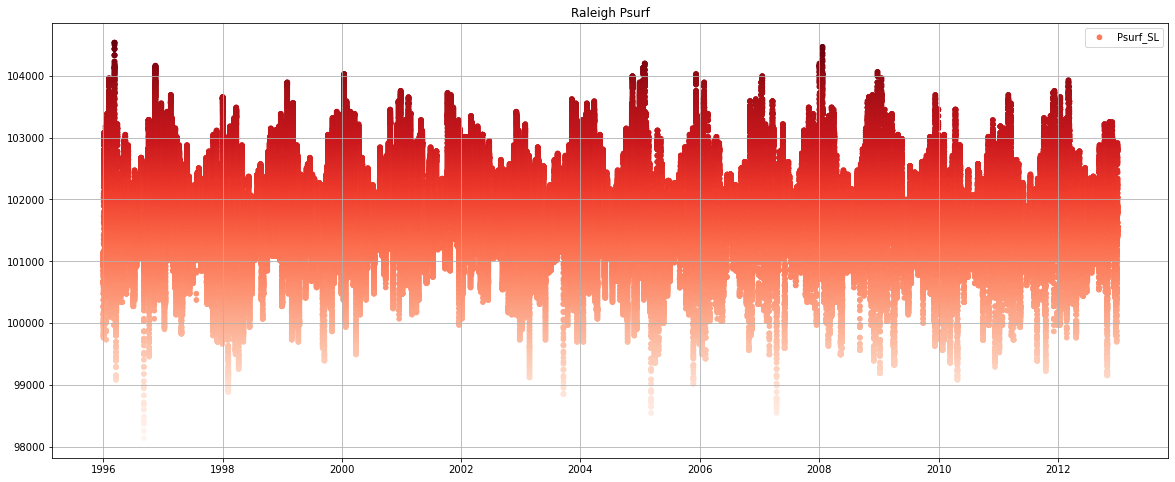

In [228]:
fig2 = plt.figure(figsize=(20,8))
plt.scatter(x= df_PW_resampled_dtcol['Datetime'], y=df_PW_resampled['Psurf_SL'], 
            c=df_PW_resampled['Psurf_SL'], cmap='Reds', 
            s=22, marker = 'o',label = 'Psurf_SL'#ds_Walker_h['LWdown'].units
           )
plt.title(f"Raleigh Psurf")
plt.legend()
plt.grid()

/Users/ud4/opt/anaconda3/envs/pyces/lib/python3.9/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


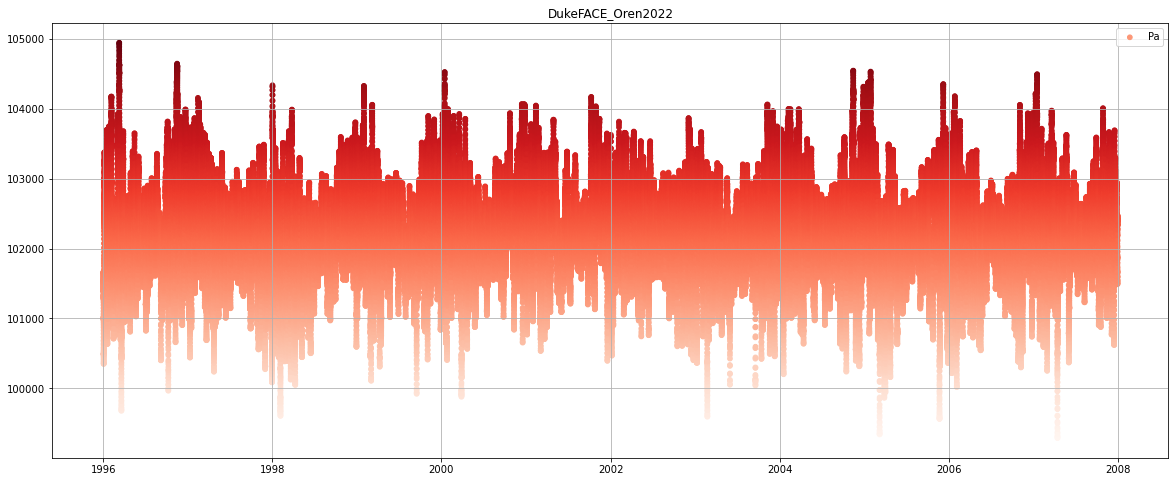

In [229]:
fig2 = plt.figure(figsize=(20,8))
plt.scatter(x= resulting_datetime, y=ds_Walker_h['Psurf'], 
            c=ds_Walker_h['Psurf'], cmap='Reds', 
            s=22, marker = 'o',label = ds_Walker_h['Psurf'].units
           )
plt.title(f"{key}")
plt.legend()
plt.grid()

In [230]:
df_Psurf_Walker = pd.DataFrame(ds_Walker_h['Psurf'].values[:,0,0], index=resulting_datetime)
df_Psurf_Walker.columns = ['Psurf']
df_Psurf_Walkers = df_Psurf_Walker.resample('30T').mean()
df_Psurf_Walkers

,Psurf
1996-01-01 00:00:00,101333.070312
1996-01-01 00:30:00,101315.164062
1996-01-01 01:00:00,101430.000000
1996-01-01 01:30:00,101446.617188
1996-01-01 02:00:00,101462.960938
...,...
2007-12-31 21:30:00,102394.960938
2007-12-31 22:00:00,101508.695312
2007-12-31 22:30:00,101543.773438
2007-12-31 23:00:00,101597.718750


In [231]:
df_Wind_Walker = pd.DataFrame(ds_Walker_h['Wind'].values[:,0,0], index=resulting_datetime)
df_Wind_Walker.columns = ['Walker_Wind']
df_Wind_Walkers = df_Wind_Walker.resample('30T').mean()
df_Wind_Walkers

/Users/ud4/opt/anaconda3/envs/pyces/lib/python3.9/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


,Walker_Wind
1996-01-01 00:00:00,1.560
1996-01-01 00:30:00,0.780
1996-01-01 01:00:00,0.000
1996-01-01 01:30:00,0.000
1996-01-01 02:00:00,0.000
...,...
2007-12-31 21:30:00,0.695
2007-12-31 22:00:00,0.664
2007-12-31 22:30:00,0.801
2007-12-31 23:00:00,0.881


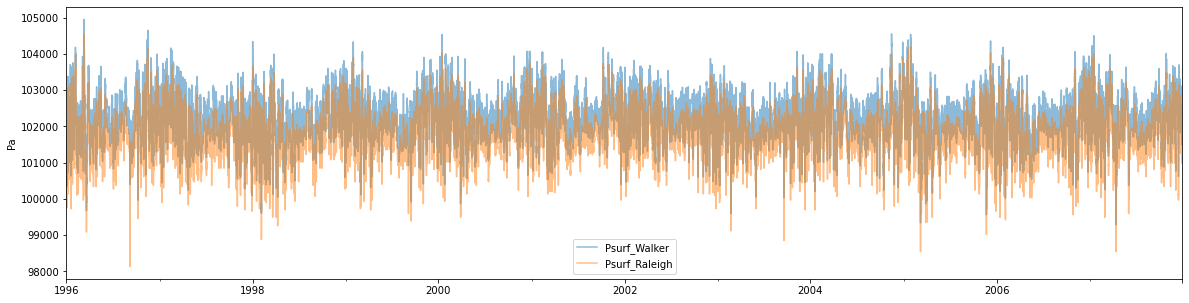

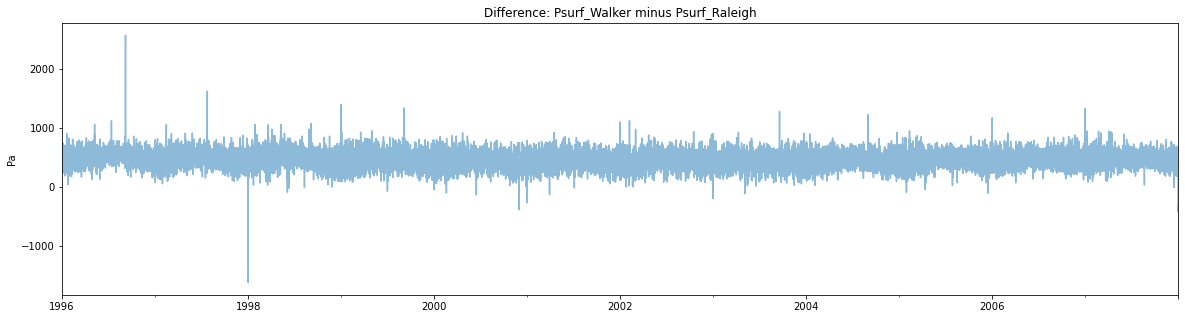

The pressure at the site is 464.0398280150264 Pa higher than Releigh Airport (av 1996-2008)


In [232]:
#df_Psurf_Walkers.merge?
df_Psurf_comp = df_Psurf_Walkers.join(df_PW_resampled['Psurf_SL'])
df_Psurf_comp.columns = ['Psurf_Walker', 'Psurf_Raleigh']
df_Psurf_comp ['Ori-New'] = df_Psurf_comp['Psurf_Walker'] - df_Psurf_comp['Psurf_Raleigh']
df_Psurf_comp[['Psurf_Walker', 'Psurf_Raleigh']].plot(alpha=.5, figsize=(20,5))
plt.ylabel("Pa")
plt.show()

df_Psurf_comp['Ori-New'].plot(alpha=.5, figsize=(20,5))
plt.title('Difference: Psurf_Walker minus Psurf_Raleigh')
plt.ylabel("Pa")
plt.show()
print(f"The pressure at the site is {df_Psurf_comp['Ori-New'].mean()} Pa higher than Releigh Airport (av 1996-2008)")


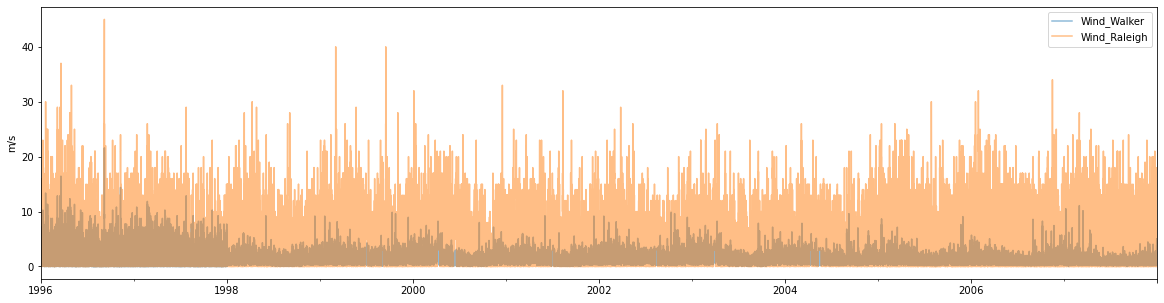

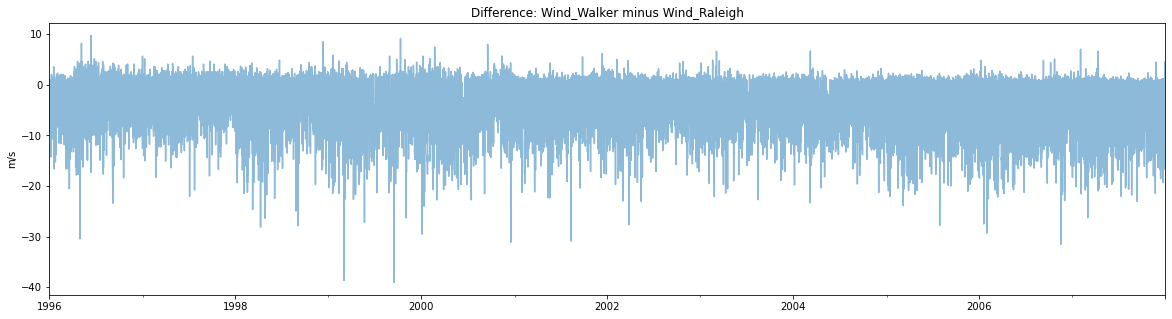

The wind at the site is -4.304747187623177 m/s higher than Releigh Airport (av 1996-2008)


In [233]:
#df_Psurf_Walkers.merge?
df_Wind_comp = df_Wind_Walkers.join(df_PW_resampled['Wind'])
df_Wind_comp.columns = ['Wind_Walker', 'Wind_Raleigh']
df_Wind_comp ['Ori-New'] = df_Wind_comp['Wind_Walker'] - df_Wind_comp['Wind_Raleigh']
df_Wind_comp[['Wind_Walker', 'Wind_Raleigh']].plot(alpha=.5, figsize=(20,5))
plt.ylabel("m/s")
plt.show()
df_Wind_comp['Ori-New'].plot(alpha=.5, figsize=(20,5))
plt.title('Difference: Wind_Walker minus Wind_Raleigh')
plt.ylabel("m/s")
plt.show()
print(f"The wind at the site is {df_Wind_comp['Ori-New'].mean()} m/s higher than Releigh Airport (av 1996-2008)")

## AmeriFlux Met


99.82047264639648


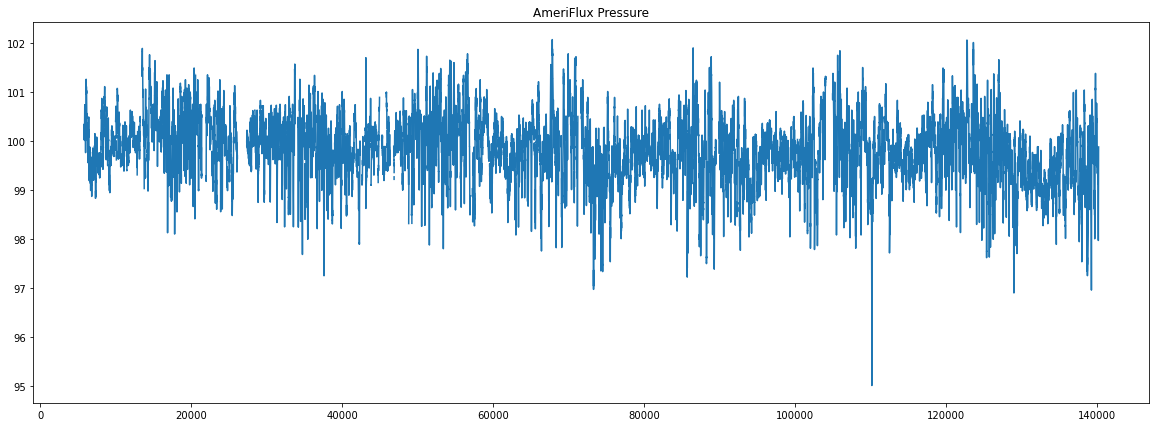

In [234]:
station_name = 'AMF_US-Dk3_BASE-BADM_4-5'
file_path = f"{paths ['AmeriFlux']}{station_name}/PA.xlsx"
df_ameri= pd.read_excel(file_path)
df_ameri['PA'].plot(figsize = (20,7))
plt.title('AmeriFlux Pressure')
print (df_ameri['PA'].mean())

## ERA5 Data

ERA5 has the similar Pressure and Wind for Duke as Ameriflux data. We are assuming that is will be better choise than NARR data which is available at coarser resolution and overestimates pressure

### Pressure and Wind - ERA5



In [235]:
paths ["ERA5_Met"]

'/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ERA5_Duke_Met/'

In [236]:
#fname = "1998_01_daily_duke_met_ERA5.nc"
key = "*daily_duke_met_ERA5.nc"
ds_era5_all= xr.open_mfdataset(glob.glob(f"{paths['ERA5_Met']}*.nc"))
ds_era5_all

<xarray.Dataset>
Dimensions:    (longitude: 8, latitude: 5, time: 149784)
Coordinates:
  * longitude  (longitude) float32 -79.4 -79.3 -79.2 -79.1 ... -78.9 -78.8 -78.7
  * latitude   (latitude) float32 36.1 36.0 35.9 35.8 35.7
  * time       (time) datetime64[ns] 1996-01-01 ... 2013-01-31T23:00:00
Data variables:
    sp         (time, latitude, longitude) float32 dask.array<chunksize=(744, 5, 8), meta=np.ndarray>
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(744, 5, 8), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(744, 5, 8), meta=np.ndarray>
    ssrd       (time, latitude, longitude) float32 dask.array<chunksize=(744, 5, 8), meta=np.ndarray>
    strd       (time, latitude, longitude) float32 dask.array<chunksize=(744, 5, 8), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-15 03:05:29 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [237]:
#Extracting Lat/Lon of Duke from existing ELM data
lat_duke = np.unique(ds_elm_all.LATIXY.values[:,0,0])[0]
lon_duke = np.unique(ds_elm_all.LONGXY.values[:,0,0])[0]
print (lon_duke,lat_duke)
lon_duke = lon_duke-360
print (lon_duke,lat_duke)

280.9057922363281 35.97819900512695
-79.09420776367188 35.97819900512695


In [238]:
target_latitude = lat_duke
target_longitude = lon_duke

# Use .sel() to select the location
era5_duke_data = ds_era5_all.sel(latitude=target_latitude, longitude=target_longitude, method='nearest')
era5_duke_data

<xarray.Dataset>
Dimensions:    (time: 149784)
Coordinates:
    longitude  float32 -79.1
    latitude   float32 36.0
  * time       (time) datetime64[ns] 1996-01-01 ... 2013-01-31T23:00:00
Data variables:
    sp         (time) float32 dask.array<chunksize=(744,), meta=np.ndarray>
    u10        (time) float32 dask.array<chunksize=(744,), meta=np.ndarray>
    v10        (time) float32 dask.array<chunksize=(744,), meta=np.ndarray>
    ssrd       (time) float32 dask.array<chunksize=(744,), meta=np.ndarray>
    strd       (time) float32 dask.array<chunksize=(744,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-15 03:05:29 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

#### Making DataFrame Era5

In [239]:
df_era5 = pd.DataFrame(data= era5_duke_data.sp.values, index = pd.to_datetime(era5_duke_data.time), columns = ["sp"])
df_era5['wind'] = ((era5_duke_data.u10**2+ era5_duke_data.v10**2)**0.5).values
print (df_era5)
df_era5_30m = df_era5.resample('30T').ffill()
df_era5_30m= df_era5_30m[df_era5_30m.index.year!= 2013]
#df_era5_30m= df_era5_30m[df_era5_30m.index.year!= 1996]
df_era5_30m

                               sp      wind
1996-01-01 00:00:00  99197.625000  1.003371
1996-01-01 01:00:00  99229.117188  1.430582
1996-01-01 02:00:00  99205.796875  0.974173
1996-01-01 03:00:00  99156.585938  1.374619
1996-01-01 04:00:00  99122.601562  1.444448
...                           ...       ...
2013-01-31 19:00:00  99095.898438  5.293796
2013-01-31 20:00:00  99150.546875  5.184982
2013-01-31 21:00:00  99207.312500  5.054787
2013-01-31 22:00:00  99269.648438  4.424480
2013-01-31 23:00:00  99374.554688  3.816943

[149784 rows x 2 columns]


,sp,wind
1996-01-01 00:00:00,99197.625000,1.003371
1996-01-01 00:30:00,99197.625000,1.003371
1996-01-01 01:00:00,99229.117188,1.430582
1996-01-01 01:30:00,99229.117188,1.430582
1996-01-01 02:00:00,99205.796875,0.974173
...,...,...
2012-12-31 21:30:00,100280.250000,2.174686
2012-12-31 22:00:00,100259.546875,2.271949
2012-12-31 22:30:00,100259.546875,2.271949
2012-12-31 23:00:00,100231.609375,2.396970


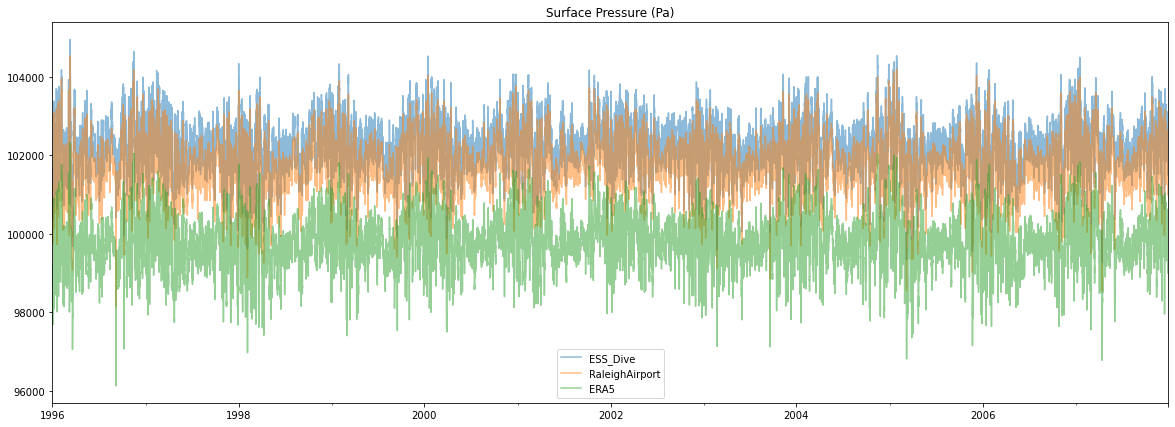

Text(0.5, 1.0, 'AmeriFlux Pressure')

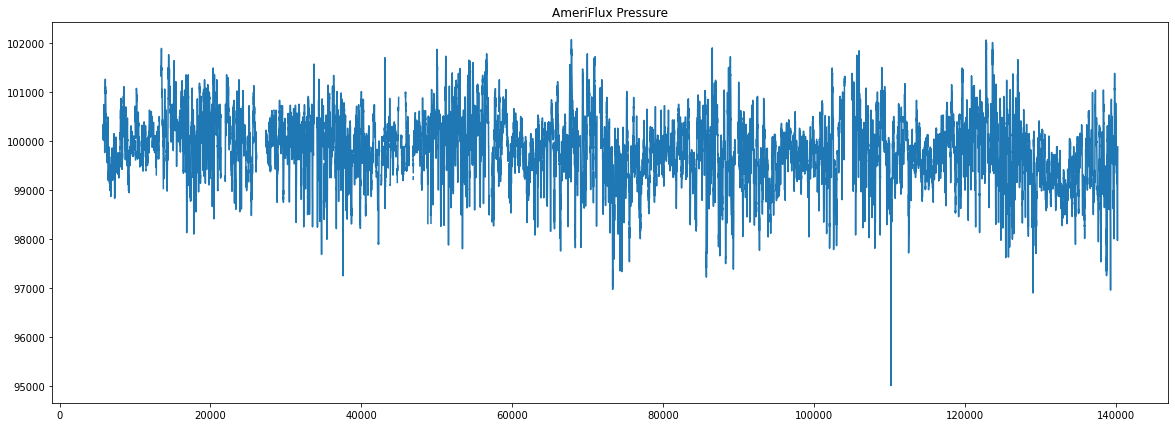

In [240]:
df_Psurf_all = df_Psurf_comp#.loc[df_Psurf_comp.index.year == 1998]
df_Psurf_all= df_Psurf_all.join(df_era5_30m['sp'])
df_Psurf_all.columns = ["ESS_Dive","RaleighAirport","ESS_Dive-Airport","ERA5"]
df_Psurf_all[['ESS_Dive','RaleighAirport','ERA5']].plot(alpha=.5, figsize=(20,7))
plt.title ("Surface Pressure (Pa)")
plt.show()
(df_ameri['PA']*1000).plot(figsize = (20,7))
plt.title('AmeriFlux Pressure')

In [241]:
print ("Mean Pressure at: \n")
print("AmeriFlux Pa:", '\t',(df_ameri['PA']*1000).mean())
df_Psurf_all[['ESS_Dive','RaleighAirport','ERA5']].mean()

Mean Pressure at: 

AmeriFlux Pa: 	 99820.47264639649


ESS_Dive          102258.273438
RaleighAirport    101794.232951
ERA5               99818.468750
dtype: float64

In [242]:
for y in range(1997, 2013):
    print (sum(df_era5_30m.index.year == y) ,sum(dict_dfs_common['PAR']['Year']==y) )

17520 17520
17520 17520
17520 17520
17568 17568
17520 17520
17520 17520
17520 17520
17568 17568
17520 17520
17520 17520
17520 17520
17568 17568
17520 17520
17520 17520
17520 17520
17568 17568


In [243]:
sum(df_era5_30m.index.year == 1996)

17568

In [244]:
df_era5_30m.sp

1996-01-01 00:00:00     99197.625000
1996-01-01 00:30:00     99197.625000
1996-01-01 01:00:00     99229.117188
1996-01-01 01:30:00     99229.117188
1996-01-01 02:00:00     99205.796875
                           ...      
2012-12-31 21:30:00    100280.250000
2012-12-31 22:00:00    100259.546875
2012-12-31 22:30:00    100259.546875
2012-12-31 23:00:00    100231.609375
2012-12-31 23:30:00    100231.609375
Freq: 30T, Name: sp, Length: 298080, dtype: float32

In [245]:
df_psurf = dict_dfs_common['PAR'].copy(deep=True)
# Copying 2000 for 1996
df_tmp = df_psurf[df_psurf['Year'] == 2000]
df_tmp ['Year'] = 1996

df_psurf = df_tmp.append(df_psurf)
df_psurf = df_psurf.reset_index(drop=True)
df_wind = df_psurf.copy(deep=True)

df_psurf['PSurf']= df_era5_30m.sp.values
df_wind['Wind']= df_era5_30m.wind.values

df_psurf = df_psurf.drop('PAR',axis=1)
df_wind = df_wind.drop('PAR',axis=1)

dict_dfs_common['PSurf'] = df_psurf
dict_dfs_common['Wind'] = df_wind

/var/folders/f1/01gxw8vn74q_x_rf_p5ztryjr405zq/T/ipykernel_46435/3228326169.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp ['Year'] = 1996


## 'aCO2', 'eCO2', 'aO3', 'eO3', 'Ndep', 'SolarElevation'
Copying these variables as is from existing data

In [246]:
fill_value = -6999. 

# 'aCO2'
FACE_Var = 'aCO2'
df_tmp = dict_dfs_common['Wind'].copy(deep=True)
df_tmp['Wind'] = fill_value
df_tmp.columns = ['Year', 'DOY', 'Time', FACE_Var]
df_tmp[FACE_Var].iloc[range(0,(df_FACEMDS ['h'][FACE_Var].index-1)[-1])]  = np.asarray(df_FACEMDS ['h'][FACE_Var].iloc[range(1,(df_FACEMDS ['h'][FACE_Var].index)[-1])].values,dtype='float')
# replacing the fill value of -9999 with our fillvalue
df_tmp.loc[df_tmp[FACE_Var] < -9000, FACE_Var] = fill_value
dict_dfs_common[FACE_Var] = df_tmp

FACE_Var = 'eCO2'
df_tmp = dict_dfs_common['Wind'].copy(deep=True)
df_tmp['Wind'] = fill_value
df_tmp.columns = ['Year', 'DOY', 'Time', FACE_Var]
df_tmp[FACE_Var].iloc[range(0,(df_FACEMDS ['h'][FACE_Var].index-1)[-1])]  = np.asarray(df_FACEMDS ['h'][FACE_Var].iloc[range(1,(df_FACEMDS ['h'][FACE_Var].index)[-1])].values,dtype='float')
# replacing the fill value of -9999 with our fillvalue
df_tmp.loc[df_tmp[FACE_Var] < -9000, FACE_Var] = fill_value
dict_dfs_common[FACE_Var] = df_tmp

FACE_Var = 'aO3'
# 'aO3' is all fill value
#df_tmp = dict_dfs_common['Wind'].copy(deep=True)
#df_tmp['Wind'] = fill_value
#df_tmp.columns = ['Year', 'DOY', 'Time', FACE_Var]
#df_tmp[FACE_Var].iloc[range(0,(df_FACEMDS ['h'][FACE_Var].index-1)[-1])]  = np.asarray(df_FACEMDS ['h'][FACE_Var].iloc[range(1,(df_FACEMDS ['h'][FACE_Var].index)[-1])].values,dtype='float')
#dict_dfs_common[FACE_Var] = df_tmp

FACE_Var = 'Ndep'
df_tmp = dict_dfs_common['Wind'].copy(deep=True)
df_tmp['Wind'] = fill_value
df_tmp.columns = ['Year', 'DOY', 'Time', FACE_Var]
df_tmp[FACE_Var].iloc[range(0,(df_FACEMDS ['h'][FACE_Var].index-1)[-1])]  = np.asarray(df_FACEMDS ['h'][FACE_Var].iloc[range(1,(df_FACEMDS ['h'][FACE_Var].index)[-1])].values,dtype='float')
# replacing the fill value of -9999 with our fillvalue
df_tmp.loc[df_tmp[FACE_Var] < -9000, FACE_Var] = fill_value
dict_dfs_common[FACE_Var] = df_tmp

FACE_Var = 'SolarElevation'
df_tmp = dict_dfs_common['Wind'].copy(deep=True)
df_tmp['Wind'] = fill_value
df_tmp.columns = ['Year', 'DOY', 'Time', FACE_Var]
df_tmp[FACE_Var].iloc[range(0,(df_FACEMDS ['h'][FACE_Var].index-1)[-1])]  = np.asarray(df_FACEMDS ['h'][FACE_Var].iloc[range(1,(df_FACEMDS ['h'][FACE_Var].index)[-1])].values,dtype='float')
# replacing the fill value of -9999 with our fillvalue
df_tmp.loc[df_tmp[FACE_Var] < -9000, FACE_Var] = fill_value
dict_dfs_common[FACE_Var] = df_tmp

/Users/ud4/opt/anaconda3/envs/pyces/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [247]:
dict_dfs_common[FACE_Var]

,Year,DOY,Time,SolarElevation
0,1996,1,30,-76.97134
1,1996,1,100,-75.95279
2,1996,1,130,-72.41380
3,1996,1,200,-67.52518
4,1996,1,230,-62.00010
...,...,...,...,...
298075,2012,366,2200,-6999.00000
298076,2012,366,2230,-6999.00000
298077,2012,366,2300,-6999.00000
298078,2012,366,2330,-6999.00000


## Making a common Dataframe of 30 min data

Largest timeseries is from "PAR" <br>
1997 - 2558.00 - 1 - 30 to 2012 - 8401.98 - 366 - 2400 <br>
Using these Index to fill in the rest <br>
FillValue = -6999.0

In [248]:
list(dict_dfs_common.keys())[::-1]

['SolarElevation',
 'Ndep',
 'eCO2',
 'aCO2',
 'Wind',
 'PSurf',
 'LWdown',
 'SWdown',
 'Rn',
 'PAR',
 'SLT',
 'VPD',
 'SVP',
 'SWP',
 'SM',
 'RH',
 'Rainf',
 'Tair']

In [249]:
# list of variables 
keys_vars = list(dict_dfs_common.keys())[::-1]

# Making a copy of the dataframe with most data
df_all_vars_30m =  dict_dfs_common['Wind'].copy(deep=True)

# Dropping JDT column since it is not same across vars based on Dates and time, due to which I get NaNs during merge
#df_all_vars_30m = df_all_vars_30m.drop('JDT',axis=1)

for k in keys_vars:
    #df_all_vars_30m = pd.merge(df_all_vars_30m, dict_dfs_common[k].drop('JDT',axis=1), how = 'left')
    df_all_vars_30m = pd.merge(df_all_vars_30m, dict_dfs_common[k], how = 'left')
    
    
fill_value = -6999.    
df_all_vars_30m['Rn'] = df_all_vars_30m['Rn'].replace(fill_value, np.nan)

# Fill NaNs with -6999.0
df_all_vars_30m_FV = df_all_vars_30m.fillna(fill_value)

# Adding a datetime column 
# Convert DOY and Time to timedelta

# Convert 'Time' values to HH:MM format
time_str = df_all_vars_30m['Time'].astype(str)
time_str = time_str.str.zfill(4)  # Ensure all times are 4 digits

# Making Sure time_str in has integer values only
#time_int = time_str.astype(float).astype(int)
time_int = np.asarray(np.asarray(time_str, dtype=float), dtype =int)

# Extract hours and minutes
hours = np.asarray(time_int//100, dtype = int)
minutes = np.asarray(time_int%100, dtype = int)

# Calculate the total minutes
total_minutes = hours * 60 + minutes

df_all_vars_30m['Date'] = pd.to_timedelta(df_all_vars_30m['DOY'] - 1, unit='D') + pd.to_timedelta(total_minutes, unit='m')

# Add Year to the Date
df_all_vars_30m['Date'] = pd.to_datetime(df_all_vars_30m['Year'].astype(float).astype(int).astype(str)) + df_all_vars_30m['Date']
df_all_vars_30m_FV['Date'] = df_all_vars_30m['Date']



In [250]:
df_all_vars_30m_FV.head()

,Year,DOY,Time,Wind,SolarElevation,Ndep,eCO2,aCO2,PSurf,LWdown,...,PAR,SLT,VPD,SVP,SWP,SM,RH,Rainf,Tair,Date
0,1996.0,1.0,30.0,1.003371,-76.97134,0.000078,374.7482,374.7482,99197.625000,-6999.0,...,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,1996-01-01 00:30:00
1,1996.0,1.0,100.0,1.003371,-75.95279,0.000078,374.7482,374.7482,99197.625000,-6999.0,...,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,1996-01-01 01:00:00
2,1996.0,1.0,130.0,1.430582,-72.41380,0.000078,374.7482,374.7482,99229.117188,-6999.0,...,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,1996-01-01 01:30:00
3,1996.0,1.0,200.0,1.430582,-67.52518,0.000078,374.7482,374.7482,99229.117188,-6999.0,...,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,1996-01-01 02:00:00
4,1996.0,1.0,230.0,0.974173,-62.00010,0.000078,374.7482,374.7482,99205.796875,-6999.0,...,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,-6999.0,1996-01-01 02:30:00


In [251]:
df_all_vars_30m_FV.tail()

,Year,DOY,Time,Wind,SolarElevation,Ndep,eCO2,aCO2,PSurf,LWdown,...,PAR,SLT,VPD,SVP,SWP,SM,RH,Rainf,Tair,Date
298075,2012.0,366.0,2200.0,2.174686,-6999.0,-6999.0,-6999.0,-6999.0,100280.250000,269.683969,...,0.0,10.40,0.56,1.04,488.87,0.39,0.44,0.0,7.58,2012-12-31 22:00:00
298076,2012.0,366.0,2230.0,2.271949,-6999.0,-6999.0,-6999.0,-6999.0,100259.546875,266.612588,...,0.0,10.40,0.52,1.01,488.87,0.39,0.46,0.0,7.08,2012-12-31 22:30:00
298077,2012.0,366.0,2300.0,2.271949,-6999.0,-6999.0,-6999.0,-6999.0,100259.546875,265.409721,...,0.0,10.40,0.50,0.99,488.83,0.39,0.47,0.0,6.88,2012-12-31 23:00:00
298078,2012.0,366.0,2330.0,2.396970,-6999.0,-6999.0,-6999.0,-6999.0,100231.609375,267.191471,...,0.0,10.40,0.52,1.01,488.83,0.39,0.46,0.0,7.17,2012-12-31 23:30:00
298079,2012.0,366.0,2400.0,2.396970,-6999.0,-6999.0,-6999.0,-6999.0,100231.609375,268.855050,...,0.0,10.39,0.54,1.03,488.77,0.39,0.46,0.0,7.44,2013-01-01 00:00:00


In [252]:
df_FACEMDS ['h']

,YEAR,DTIME,DOY,HRMIN,Rainf,Rainf_f,Tair,Tair_f,RH,RH_f,...,LWdown,LWdown_f,PSurf,PSurf_f,aCO2,eCO2,aO3,eO3,Ndep,SolarElevation
0,YEAR,DTIME,DOY,HRMIN,kg/m2/s,---,K,---,%,---,...,W/m2,---,Pa,---,ppmv,ppmv,ppbv,ppbv,g/m2/30-minutes,degree
1,1996,1.010417,1,15,2.800000e-05,0,2.820500e+02,0,1.000000e+02,0,...,2.972362e+02,1,1.013331e+05,4,3.747482e+02,3.747482e+02,-9.999000e+03,-9.999000e+03,7.798270e-05,-7.697134e+01
2,1996,1.031250,1,45,2.800000e-05,0,2.817500e+02,0,1.000000e+02,0,...,2.951620e+02,1,1.013152e+05,4,3.747482e+02,3.747482e+02,-9.999000e+03,-9.999000e+03,7.798270e-05,-7.595279e+01
3,1996,1.052083,1,115,2.800000e-05,0,2.814500e+02,0,1.000000e+02,0,...,2.930988e+02,1,1.014300e+05,4,3.747482e+02,3.747482e+02,-9.999000e+03,-9.999000e+03,7.798270e-05,-7.241380e+01
4,1996,1.072917,1,145,2.800000e-05,0,2.814500e+02,0,1.000000e+02,0,...,2.930988e+02,1,1.014466e+05,4,3.747482e+02,3.747482e+02,-9.999000e+03,-9.999000e+03,7.798270e-05,-6.752518e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210380,2007,365.90625,365,2145,0.0,0,278.982,0,73.887,0,...,264.8422,1,102395.0,4,400.9378,548.8154,-9999.0,-9999.0,0.000078,-54.26078
210381,2007,365.927063,365,2215,0.0,0,278.929,0,73.812,0,...,264.471,1,101508.7,4,400.9378,548.8154,-9999.0,-9999.0,0.000078,-60.15933
210382,2007,365.947906,365,2245,0.0,0,278.974,0,72.925,0,...,264.2967,1,101543.8,4,400.9378,548.8154,-9999.0,-9999.0,0.000078,-65.81711
210383,2007,365.96875,365,2315,0.0,0,279.181,0,73.575,0,...,265.9336,1,101597.7,4,400.9378,548.8154,-9999.0,-9999.0,0.000078,-70.98035


In [253]:
df_all_vars_30m_FV.columns

Index(['Year', 'DOY', 'Time', 'Wind', 'SolarElevation', 'Ndep', 'eCO2', 'aCO2',
       'PSurf', 'LWdown', 'SWdown', 'Rn', 'PAR', 'SLT', 'VPD', 'SVP', 'SWP',
       'SM', 'RH', 'Rainf', 'Tair', 'Date'],
      dtype='object')

In [254]:
df_FACEMDS ['h'].columns

Index(['YEAR', 'DTIME', 'DOY', 'HRMIN', 'Rainf', 'Rainf_f ', 'Tair', 'Tair_f',
       'RH', 'RH_f', 'VPD', 'VPD_f', 'Qair', 'Qair_f', 'Wind', 'Wind_f',
       'SWdown', 'SWdown_f', 'PAR', 'PAR_f', 'LWdown', 'LWdown_f', 'PSurf',
       'PSurf_f', 'aCO2', 'eCO2', 'aO3', 'eO3', 'Ndep', 'SolarElevation'],
      dtype='object')

In [255]:
np.intersect1d(np.array(df_FACEMDS ['h'].columns), np.array(df_all_vars_30m_FV.columns))

array(['DOY', 'LWdown', 'Ndep', 'PAR', 'PSurf', 'RH', 'Rainf', 'SWdown',
       'SolarElevation', 'Tair', 'VPD', 'Wind', 'aCO2', 'eCO2'],
      dtype=object)

In [256]:
np.unique(np.asarray(df_FACEMDS ['h']['aO3'][1:], dtype='float'))

array([-9999.])

### Filling missing values from existing FACEMDS Dateset.
Especially for the year 1996 and partial 1997

In [257]:
col_names = ['LWdown','SWdown','PAR','RH','Tair','Rainf','VPD'] 
for col_fill in col_names:
    if col_fill == 'RH':
        factor_multiply = 1/100
        factor_add = 0
    elif col_fill == 'Tair':
        factor_multiply = 1
        factor_add = -273.15
    elif col_fill == 'Rainf':
        factor_multiply = (30*60) # from (Cummulative 30 min) kg/m2/s to kg/m2/d
        factor_add = 0
    elif col_fill == 'VPD':
        factor_multiply = 1/1000 # Pa to KPa
        factor_add = 0
    else:
        factor_multiply = 1
        factor_add = 0
    (df_all_vars_30m_FV[col_fill][df_all_vars_30m_FV[col_fill] == fill_value]) = (np.array(df_FACEMDS ['h'].iloc[(df_all_vars_30m_FV[col_fill][df_all_vars_30m_FV[col_fill] == fill_value]).index+1][col_fill].values, dtype='float')*factor_multiply + factor_add)
    (df_all_vars_30m[col_fill][df_all_vars_30m[col_fill] == fill_value]) = (np.array(df_FACEMDS ['h'].iloc[(df_all_vars_30m[col_fill][df_all_vars_30m[col_fill] == fill_value]).index+1][col_fill].values, dtype='float')*factor_multiply + factor_add)
    

/var/folders/f1/01gxw8vn74q_x_rf_p5ztryjr405zq/T/ipykernel_46435/4182845497.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (df_all_vars_30m_FV[col_fill][df_all_vars_30m_FV[col_fill] == fill_value]) = (np.array(df_FACEMDS ['h'].iloc[(df_all_vars_30m_FV[col_fill][df_all_vars_30m_FV[col_fill] == fill_value]).index+1][col_fill].values, dtype='float')*factor_multiply + factor_add)
/var/folders/f1/01gxw8vn74q_x_rf_p5ztryjr405zq/T/ipykernel_46435/4182845497.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (df_all_vars_30m[col_fill][df_all_vars_30m[col_fill] == fill_value]) = (np.array(df_FACEMDS ['h'].iloc[(df_all_v

In [258]:
df_all_vars_30m_FV

,Year,DOY,Time,Wind,SolarElevation,Ndep,eCO2,aCO2,PSurf,LWdown,...,PAR,SLT,VPD,SVP,SWP,SM,RH,Rainf,Tair,Date
0,1996.0,1.0,30.0,1.003371,-76.97134,0.000078,374.7482,374.7482,99197.625000,297.236200,...,0.0,-6999.00,0.00,-6999.00,-6999.00,-6999.00,1.00,0.0504,8.90,1996-01-01 00:30:00
1,1996.0,1.0,100.0,1.003371,-75.95279,0.000078,374.7482,374.7482,99197.625000,295.162000,...,0.0,-6999.00,0.00,-6999.00,-6999.00,-6999.00,1.00,0.0504,8.60,1996-01-01 01:00:00
2,1996.0,1.0,130.0,1.430582,-72.41380,0.000078,374.7482,374.7482,99229.117188,293.098800,...,0.0,-6999.00,0.00,-6999.00,-6999.00,-6999.00,1.00,0.0504,8.30,1996-01-01 01:30:00
3,1996.0,1.0,200.0,1.430582,-67.52518,0.000078,374.7482,374.7482,99229.117188,293.098800,...,0.0,-6999.00,0.00,-6999.00,-6999.00,-6999.00,1.00,0.0504,8.30,1996-01-01 02:00:00
4,1996.0,1.0,230.0,0.974173,-62.00010,0.000078,374.7482,374.7482,99205.796875,293.098800,...,0.0,-6999.00,0.00,-6999.00,-6999.00,-6999.00,1.00,0.0000,8.30,1996-01-01 02:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298075,2012.0,366.0,2200.0,2.174686,-6999.00000,-6999.000000,-6999.0000,-6999.0000,100280.250000,269.683969,...,0.0,10.40,0.56,1.04,488.87,0.39,0.44,0.0000,7.58,2012-12-31 22:00:00
298076,2012.0,366.0,2230.0,2.271949,-6999.00000,-6999.000000,-6999.0000,-6999.0000,100259.546875,266.612588,...,0.0,10.40,0.52,1.01,488.87,0.39,0.46,0.0000,7.08,2012-12-31 22:30:00
298077,2012.0,366.0,2300.0,2.271949,-6999.00000,-6999.000000,-6999.0000,-6999.0000,100259.546875,265.409721,...,0.0,10.40,0.50,0.99,488.83,0.39,0.47,0.0000,6.88,2012-12-31 23:00:00
298078,2012.0,366.0,2330.0,2.396970,-6999.00000,-6999.000000,-6999.0000,-6999.0000,100231.609375,267.191471,...,0.0,10.40,0.52,1.01,488.83,0.39,0.46,0.0000,7.17,2012-12-31 23:30:00


In [259]:
df_all_vars_30m

,Year,DOY,Time,Wind,SolarElevation,Ndep,eCO2,aCO2,PSurf,LWdown,...,PAR,SLT,VPD,SVP,SWP,SM,RH,Rainf,Tair,Date
0,1996,1,30,1.003371,-76.97134,0.000078,374.7482,374.7482,99197.625000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996-01-01 00:30:00
1,1996,1,100,1.003371,-75.95279,0.000078,374.7482,374.7482,99197.625000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996-01-01 01:00:00
2,1996,1,130,1.430582,-72.41380,0.000078,374.7482,374.7482,99229.117188,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996-01-01 01:30:00
3,1996,1,200,1.430582,-67.52518,0.000078,374.7482,374.7482,99229.117188,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996-01-01 02:00:00
4,1996,1,230,0.974173,-62.00010,0.000078,374.7482,374.7482,99205.796875,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996-01-01 02:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298075,2012,366,2200,2.174686,-6999.00000,-6999.000000,-6999.0000,-6999.0000,100280.250000,269.683969,...,0.0,10.40,0.56,1.04,488.87,0.39,0.44,0.0,7.58,2012-12-31 22:00:00
298076,2012,366,2230,2.271949,-6999.00000,-6999.000000,-6999.0000,-6999.0000,100259.546875,266.612588,...,0.0,10.40,0.52,1.01,488.87,0.39,0.46,0.0,7.08,2012-12-31 22:30:00
298077,2012,366,2300,2.271949,-6999.00000,-6999.000000,-6999.0000,-6999.0000,100259.546875,265.409721,...,0.0,10.40,0.50,0.99,488.83,0.39,0.47,0.0,6.88,2012-12-31 23:00:00
298078,2012,366,2330,2.396970,-6999.00000,-6999.000000,-6999.0000,-6999.0000,100231.609375,267.191471,...,0.0,10.40,0.52,1.01,488.83,0.39,0.46,0.0,7.17,2012-12-31 23:30:00


In [260]:
# replacing fillvalues to nan in a separate dataframe
df_all_vars_30m = df_all_vars_30m_FV.replace(fill_value, np.nan)
# Saving the processed Data

df_all_vars_30m_FV.to_csv(f"{paths['Save_Processed']}Processed_Duke_Met_Data_All_Vars_30m_FV.csv")
df_all_vars_30m.to_csv(f"{paths['Save_Processed']}Processed_Duke_Met_Data_All_Vars_30m.csv")

In [261]:
paths['Save_Processed']

'/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_Met_Data_processed/'

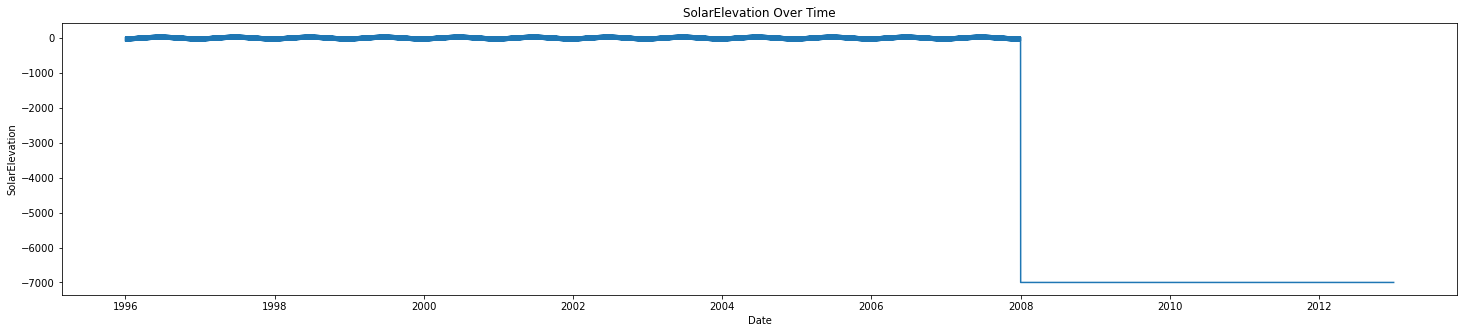

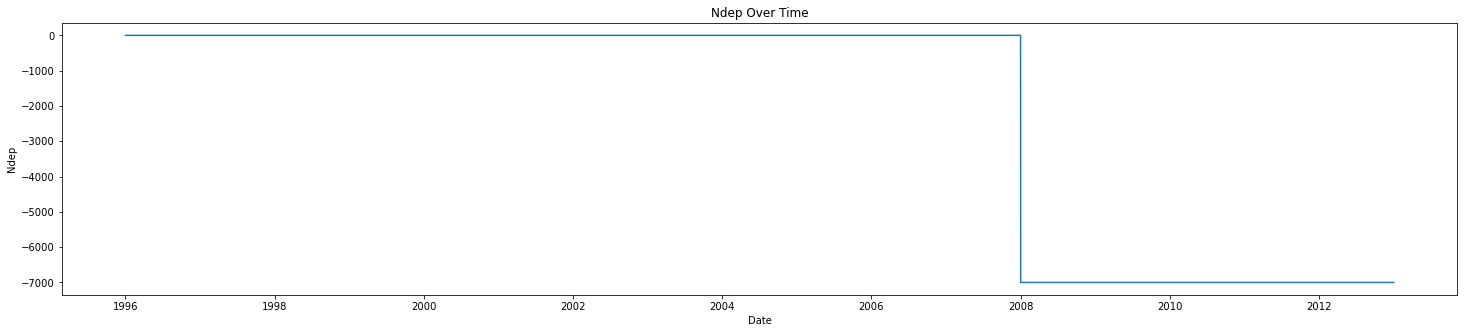

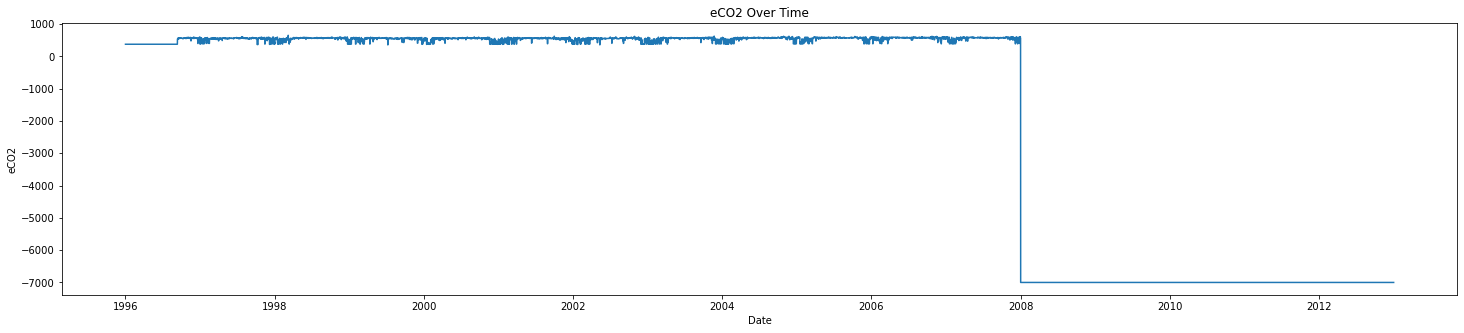

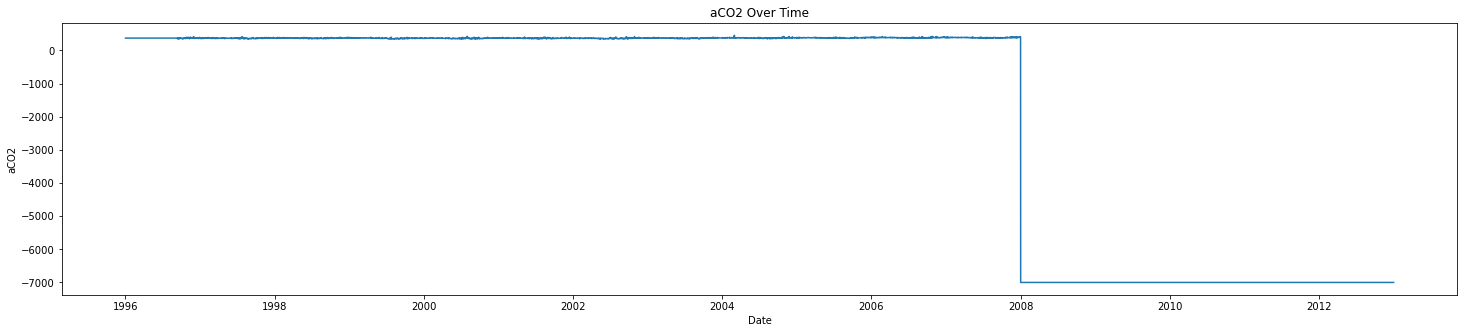

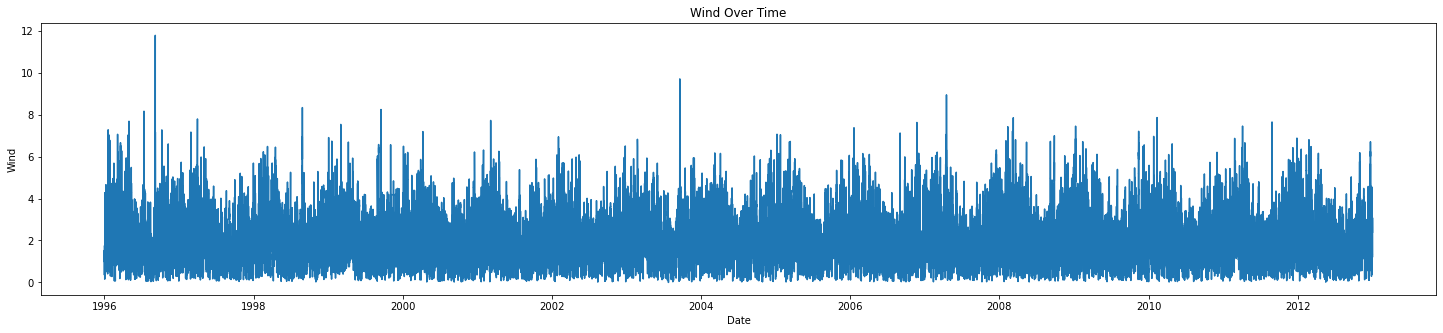

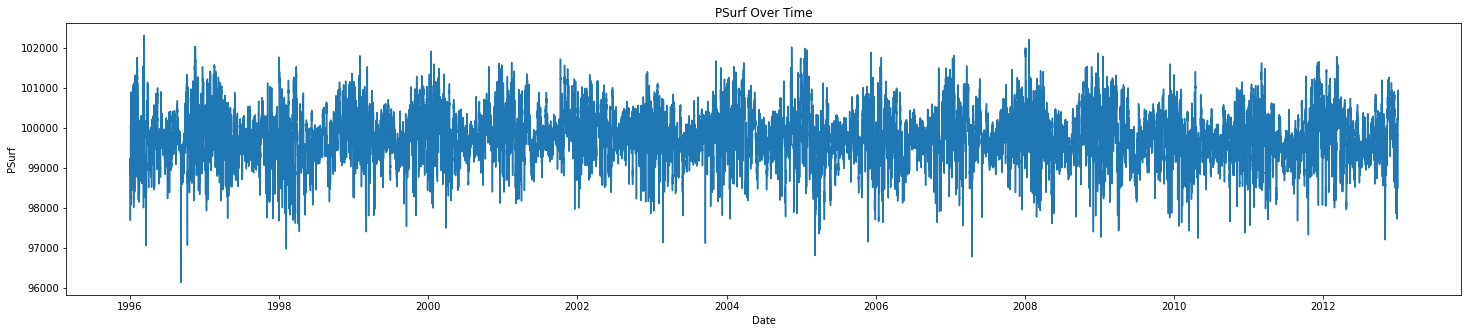

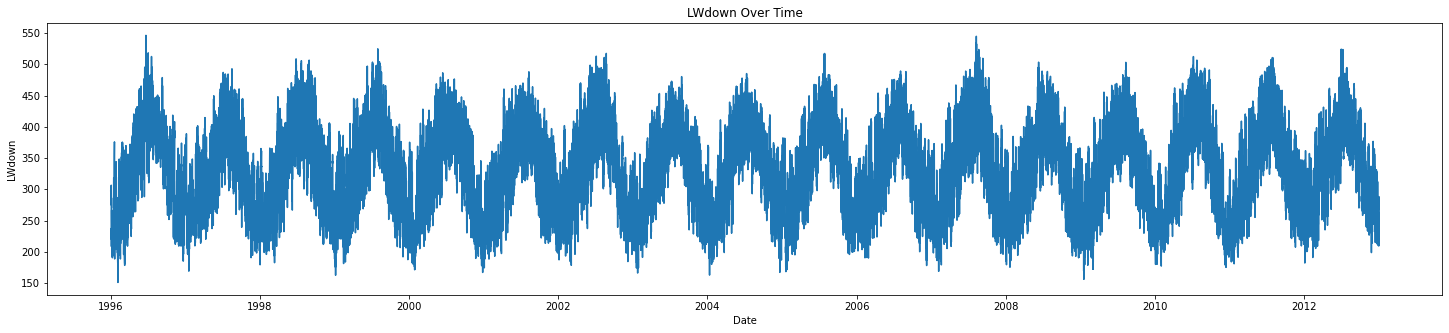

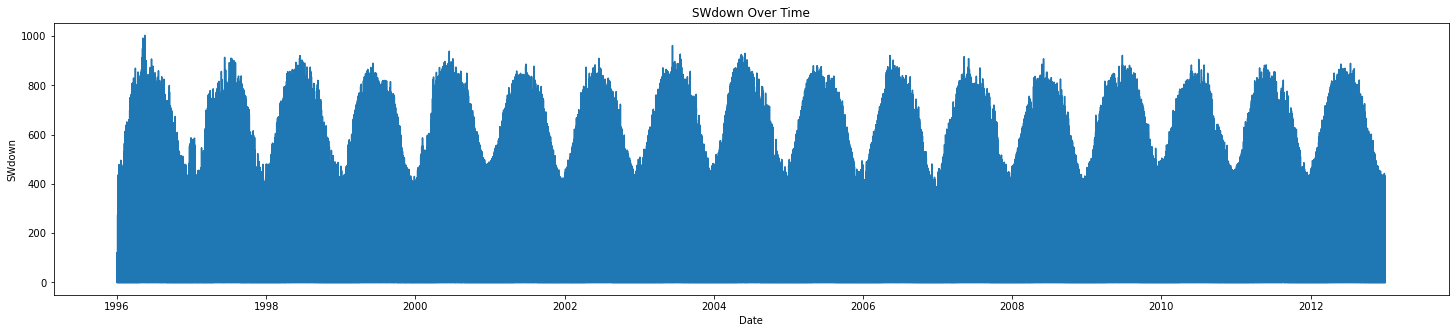

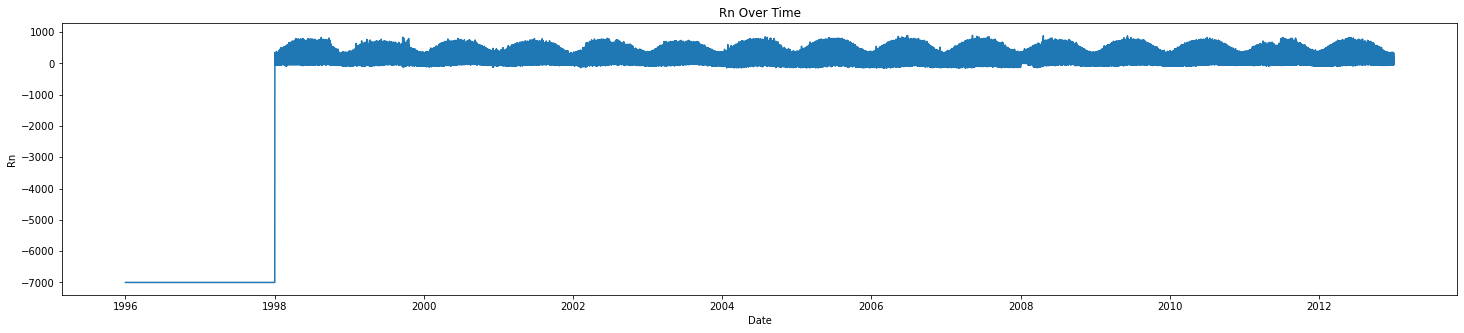

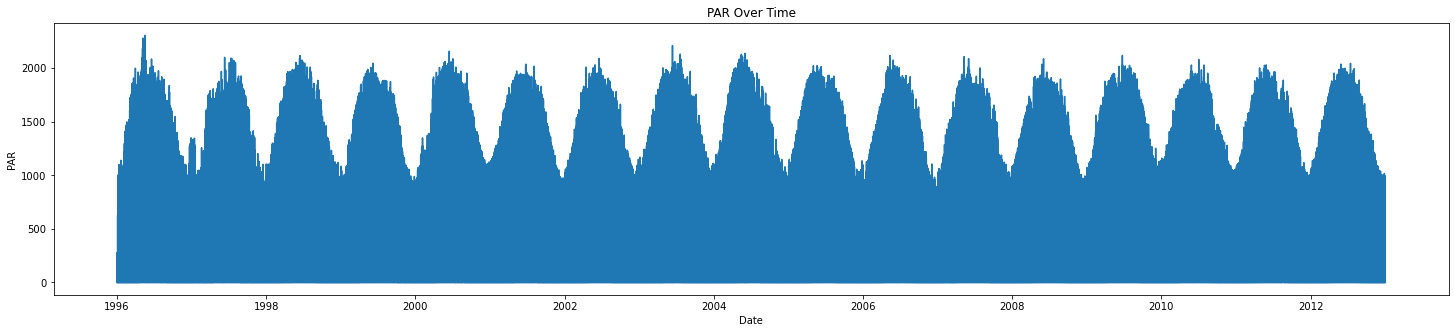

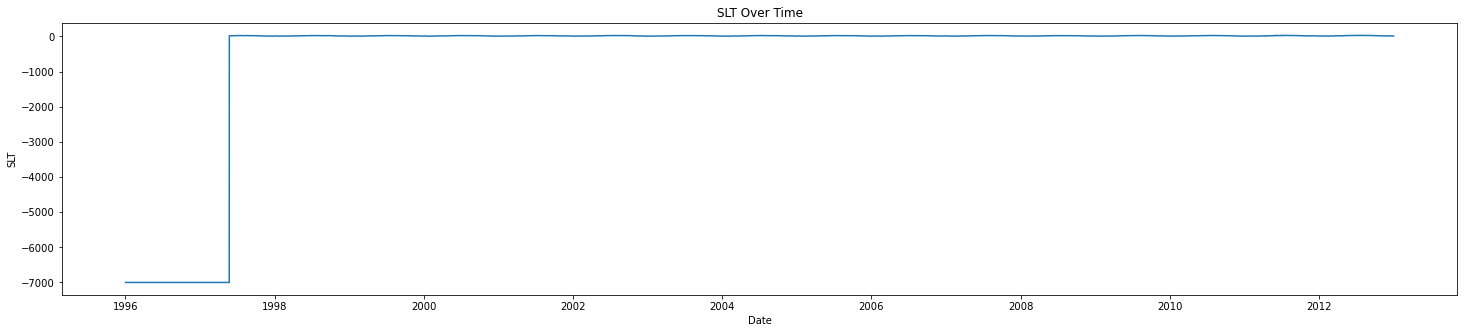

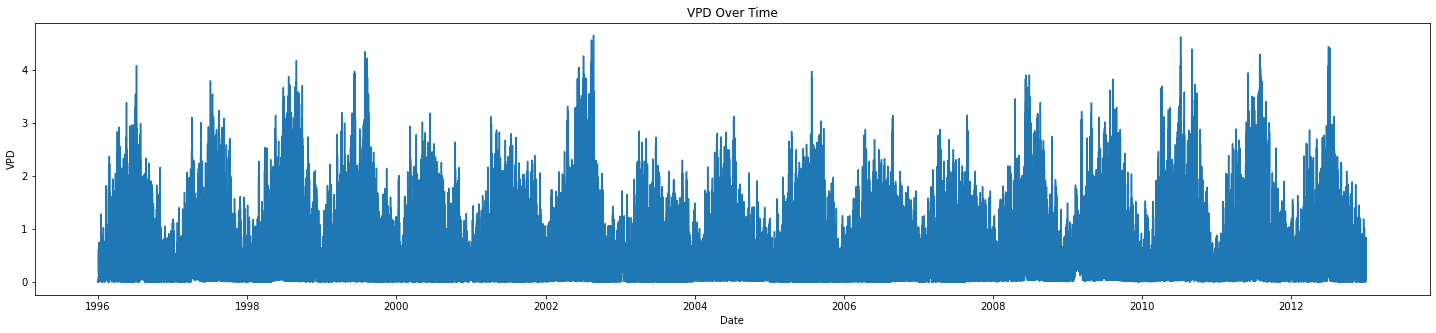

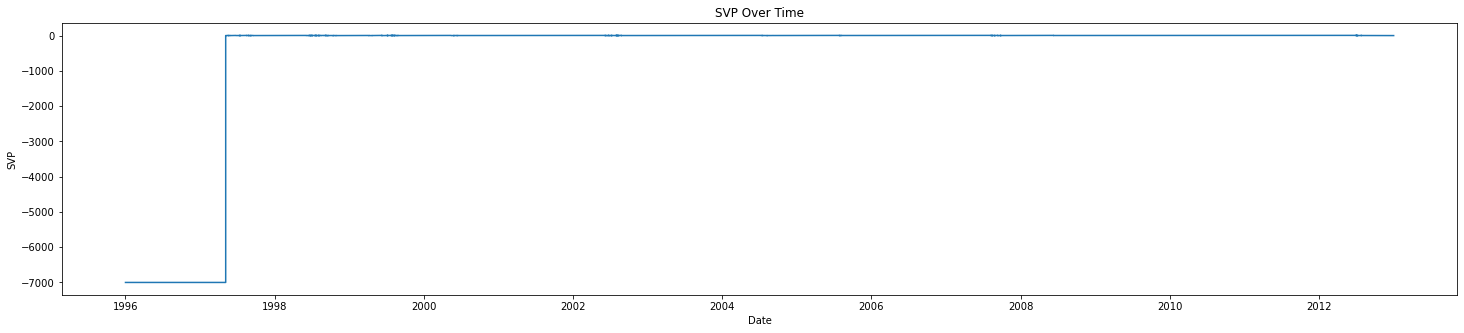

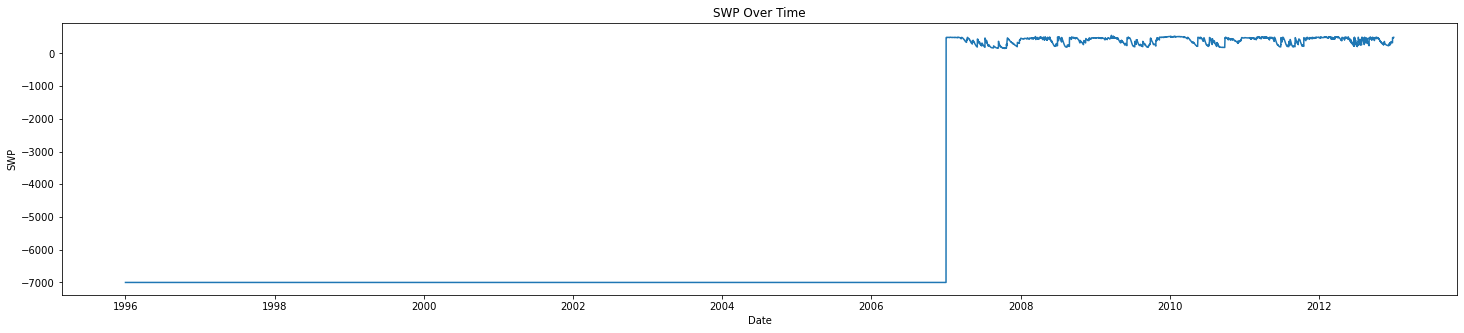

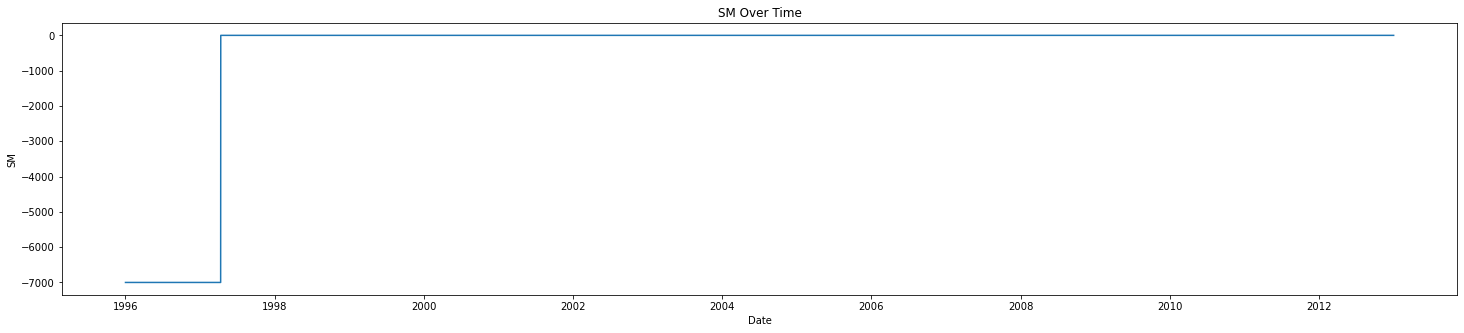

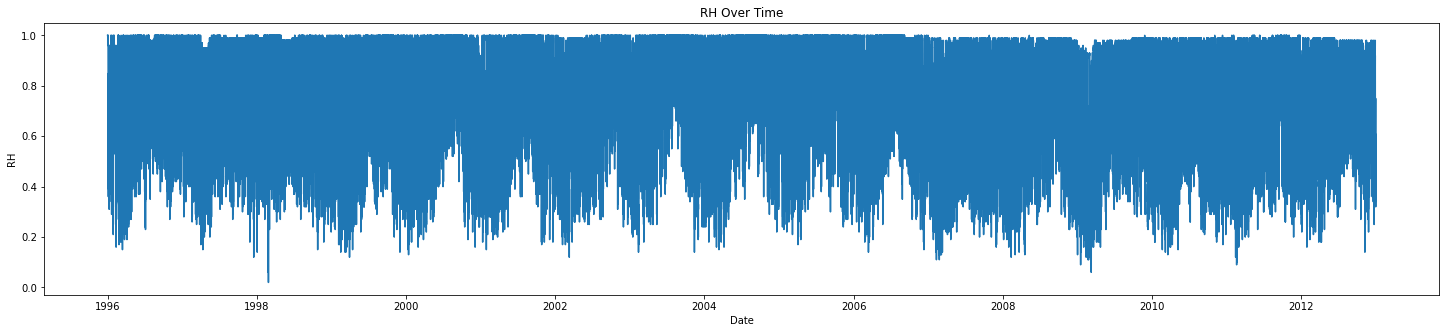

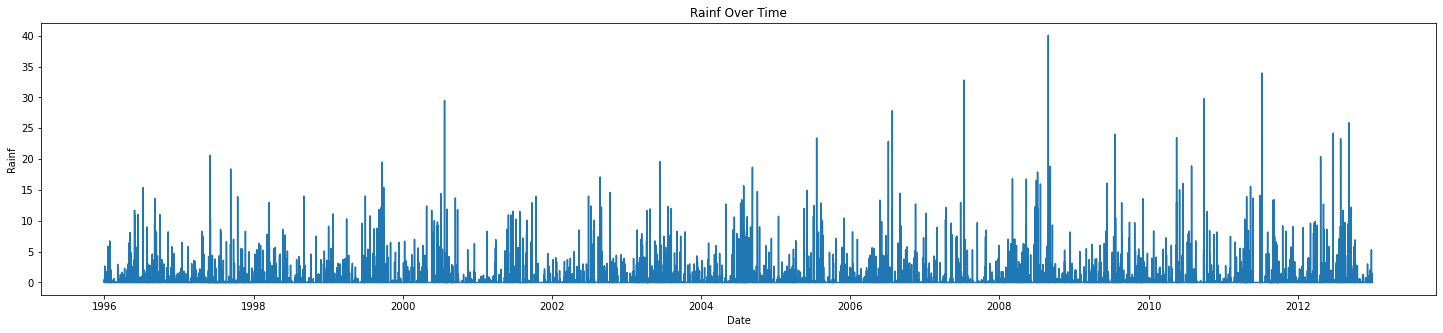

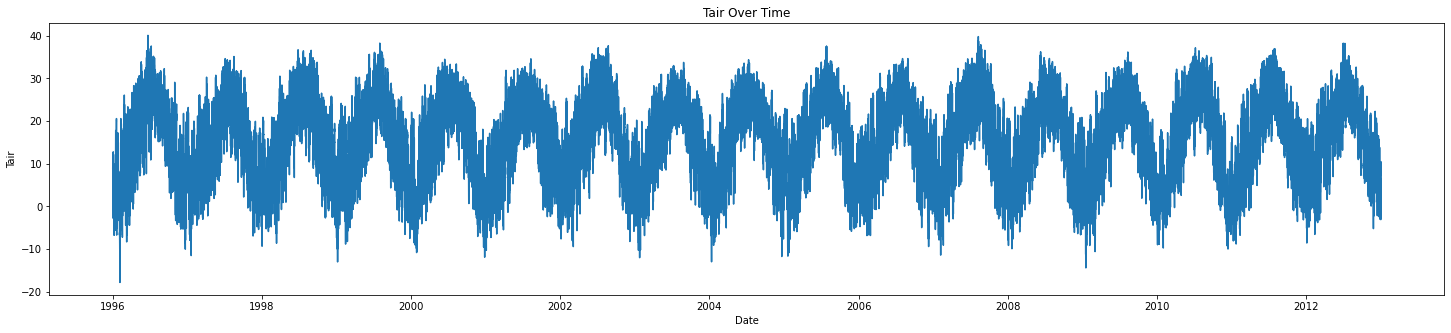

In [262]:
for k in keys_vars:
     # Set the figure size
    plt.figure(figsize=(25, 5))

    # Create the line plot
    plt.plot(df_all_vars_30m_FV['Date'], df_all_vars_30m_FV[k])

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel(k)
    plt.title(f'{k} Over Time')


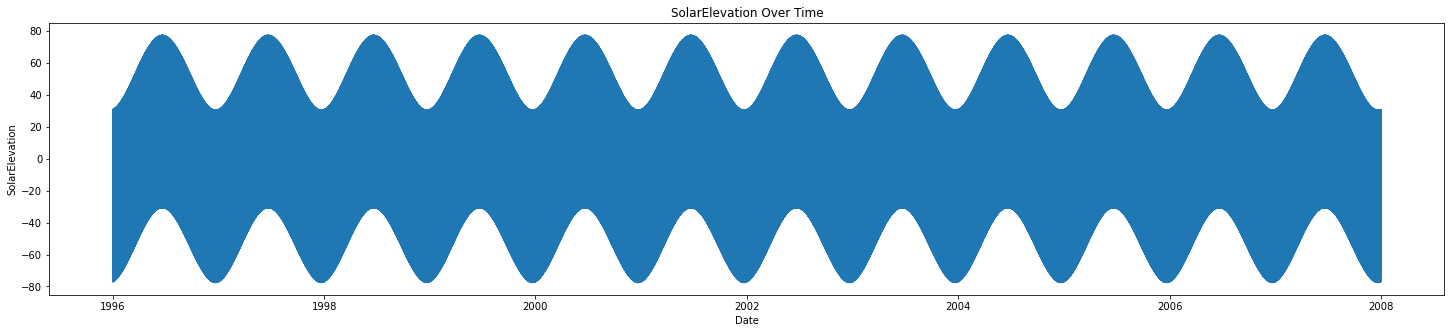

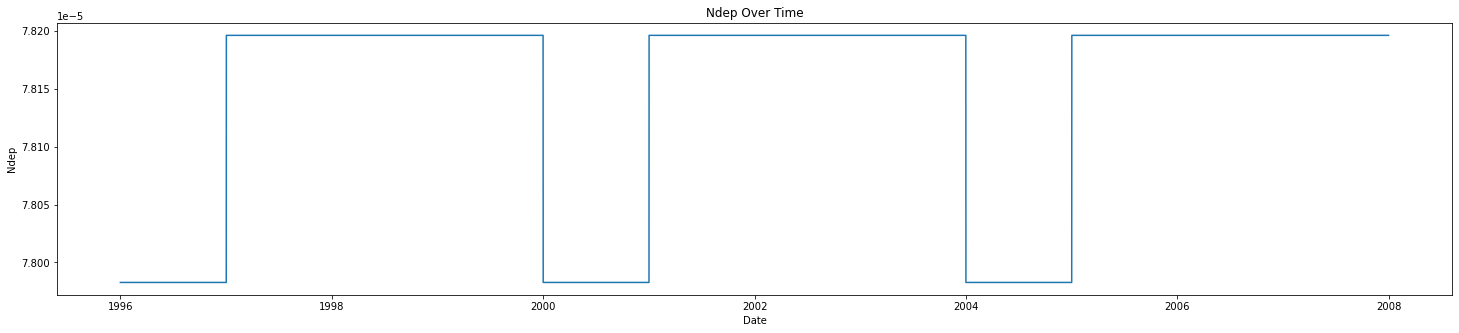

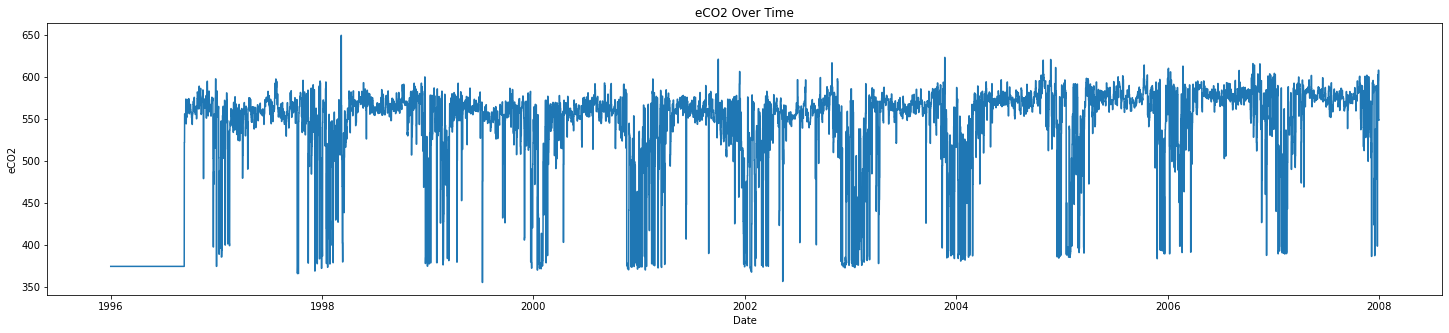

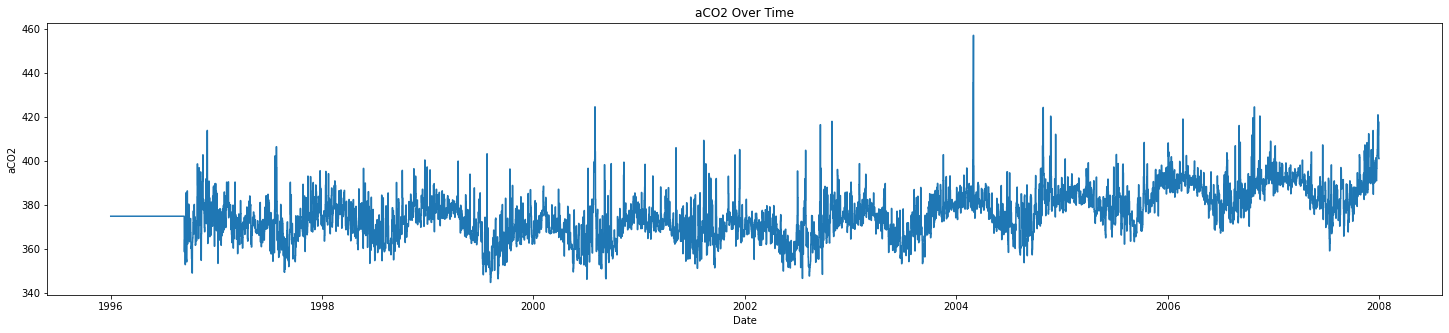

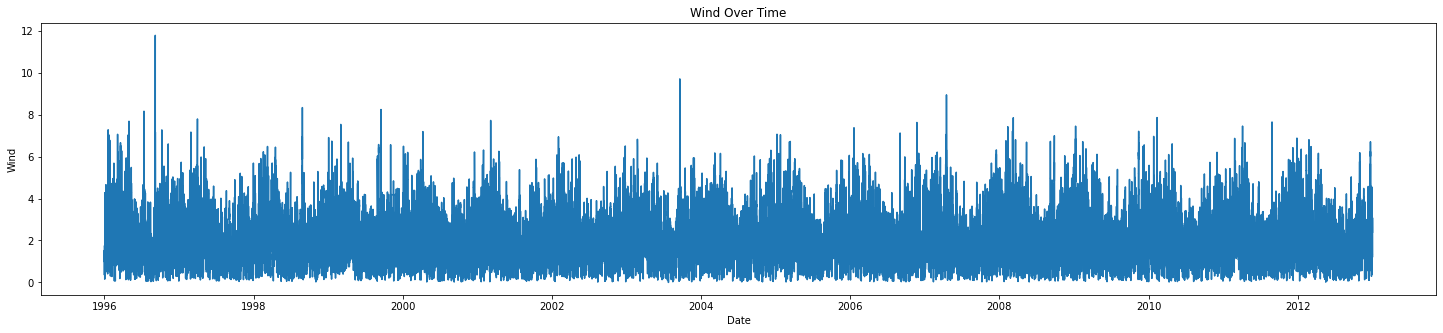

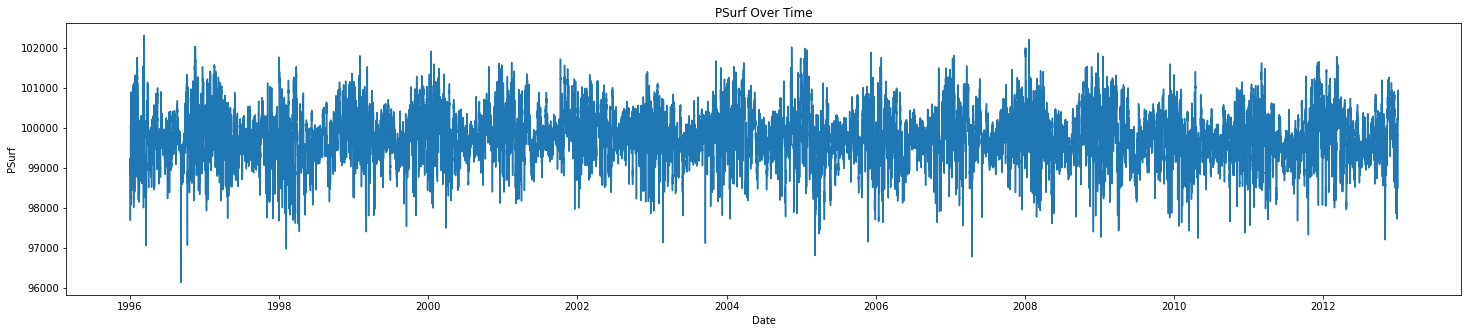

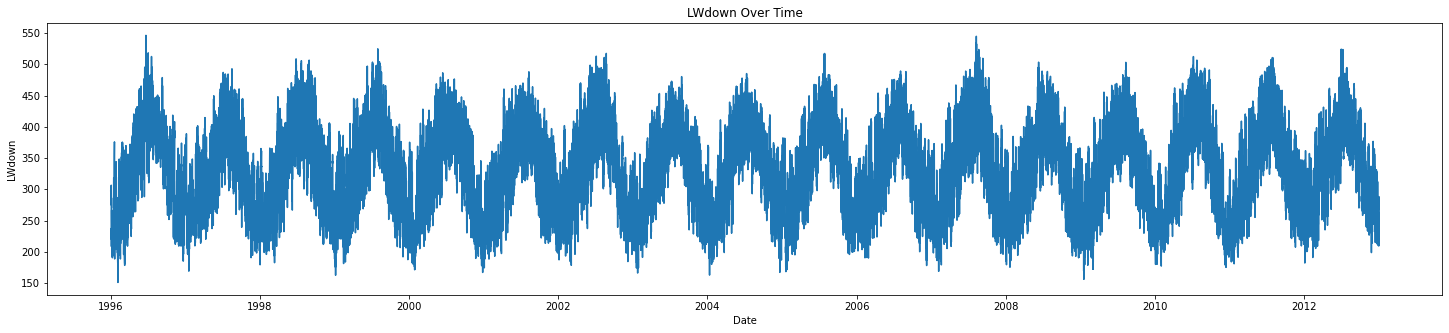

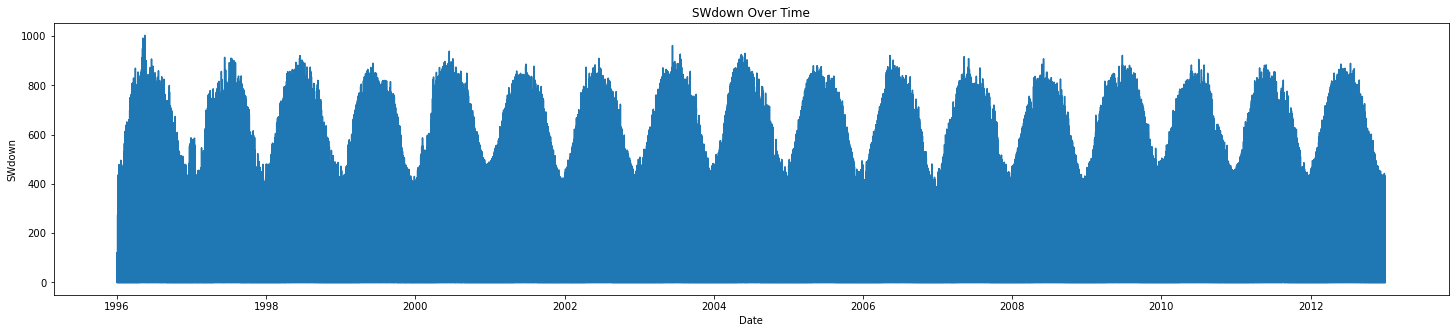

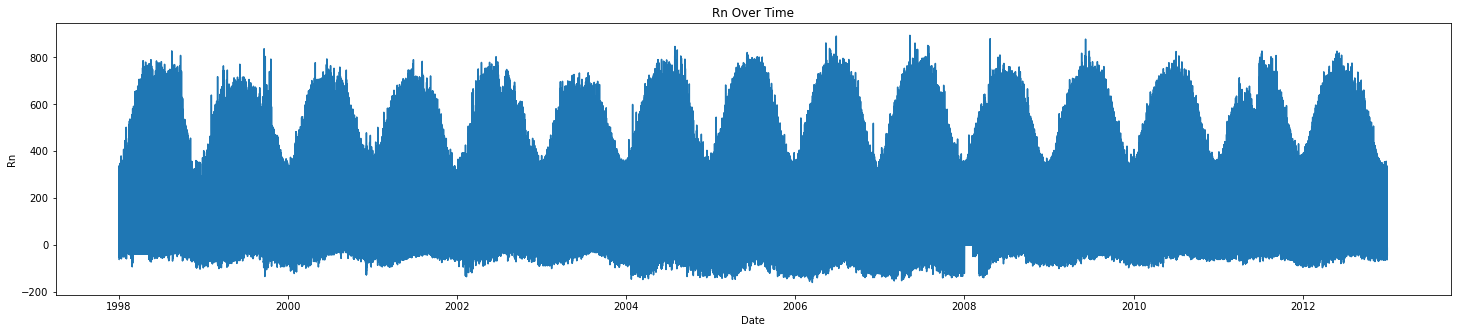

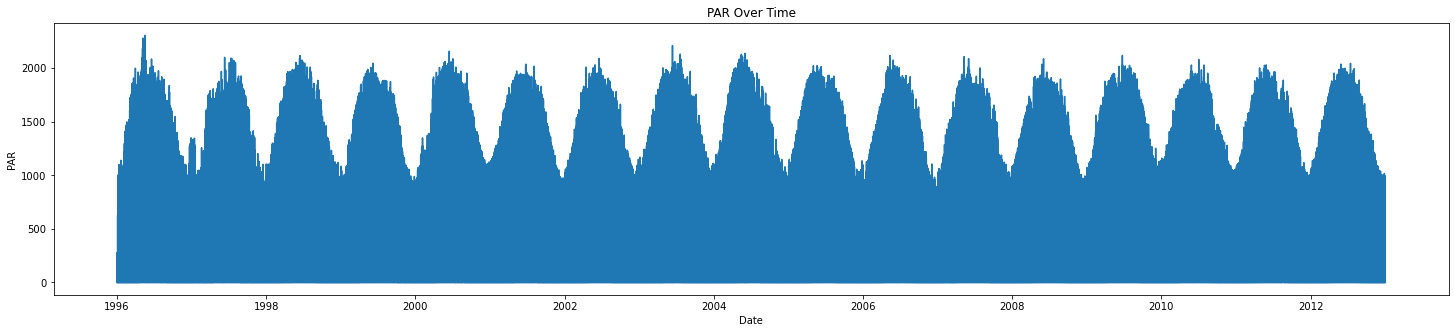

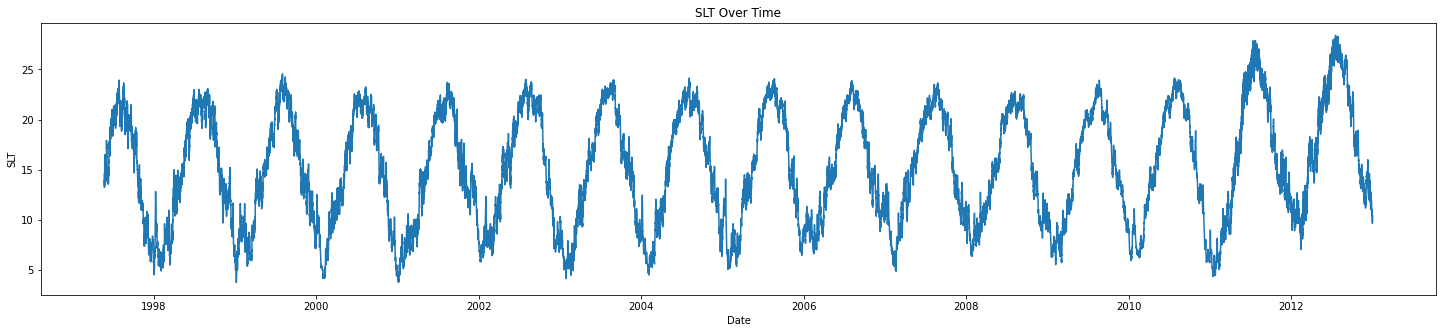

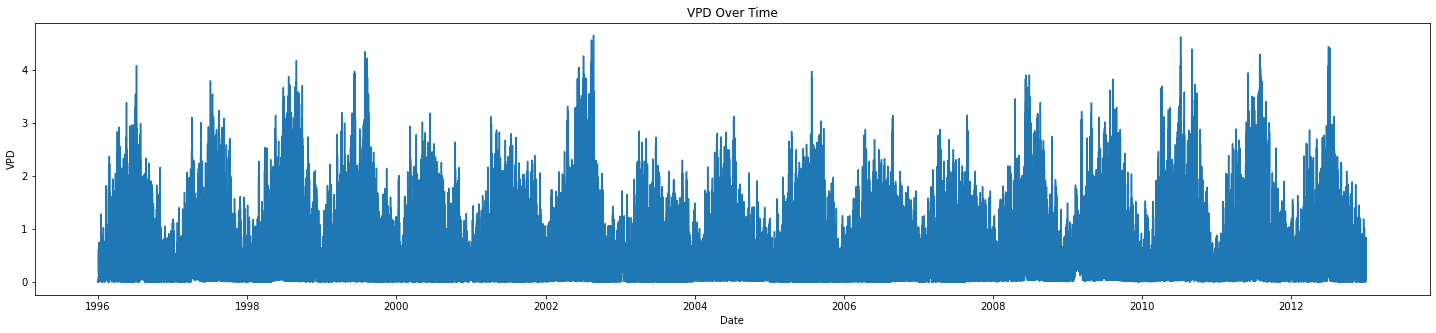

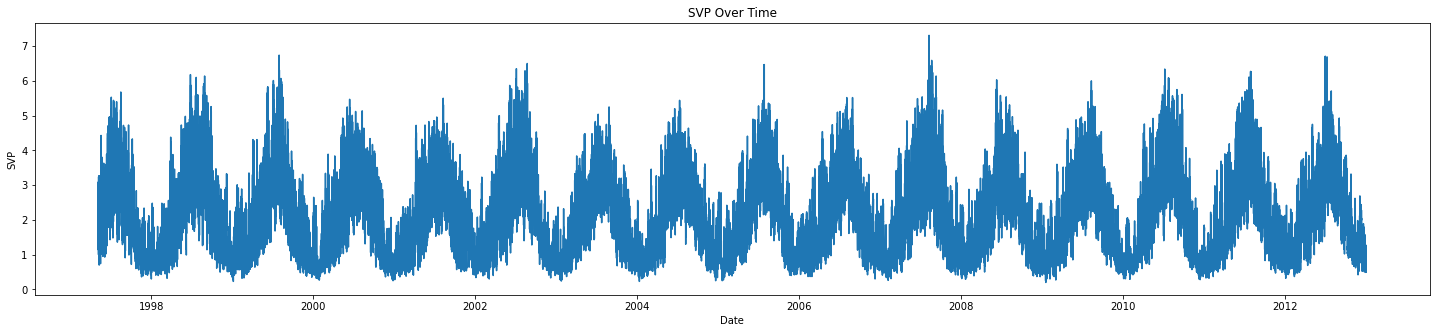

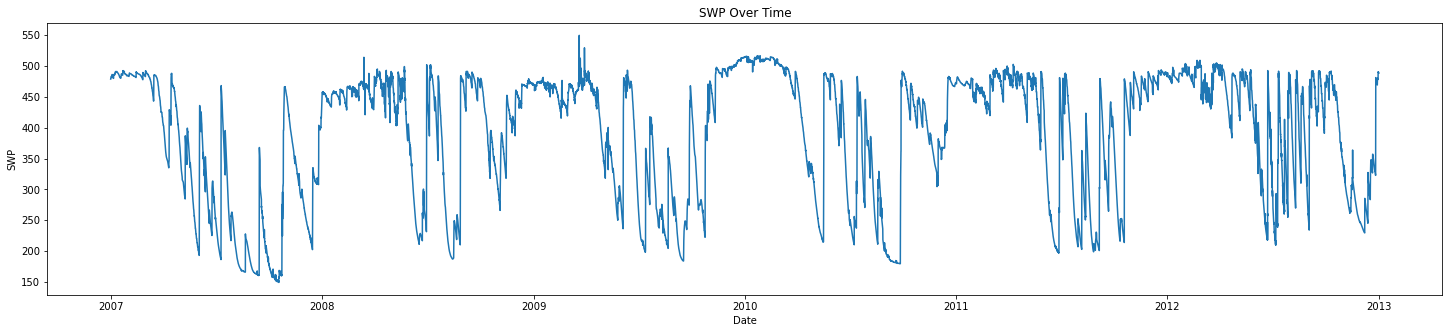

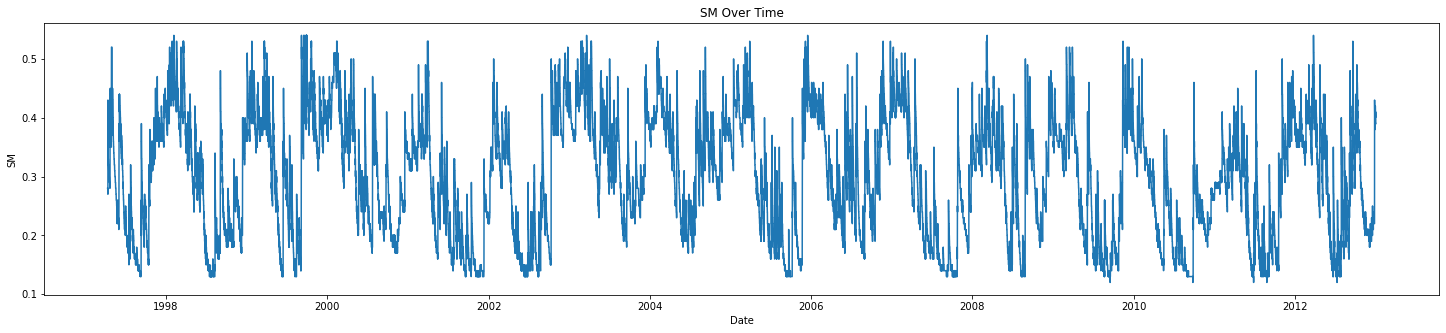

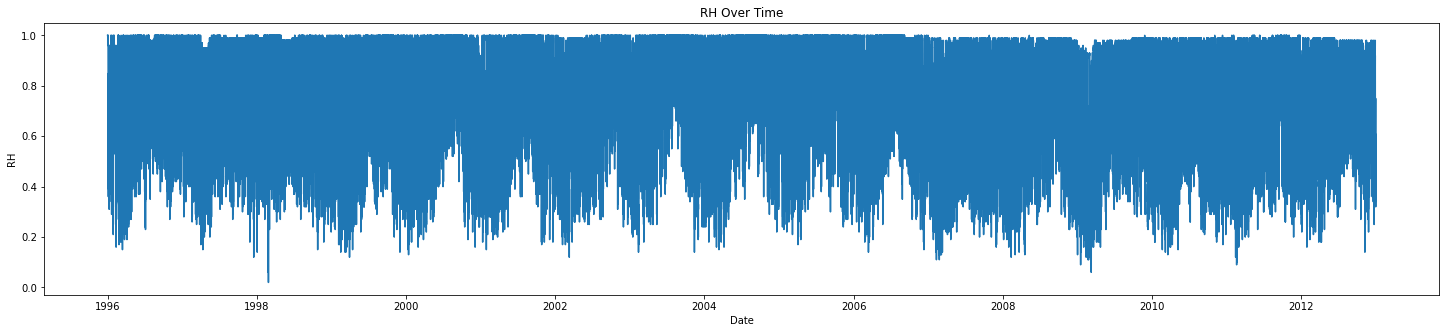

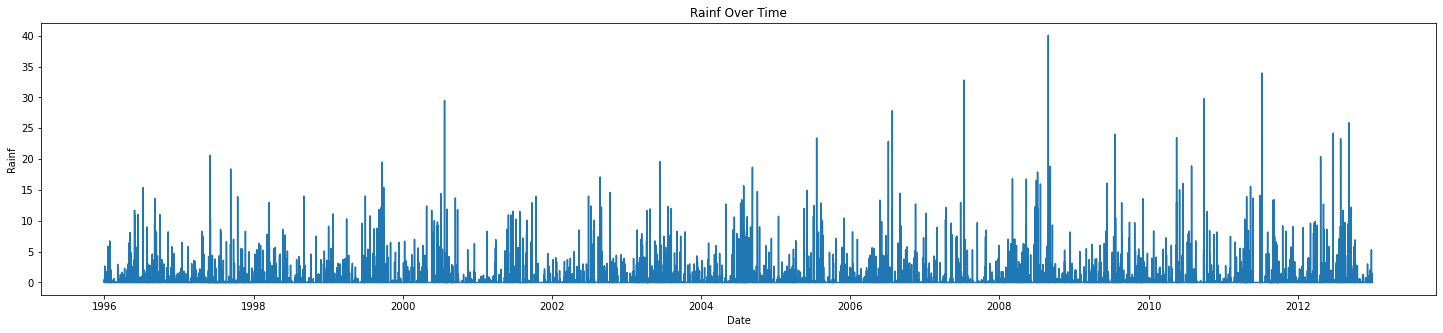

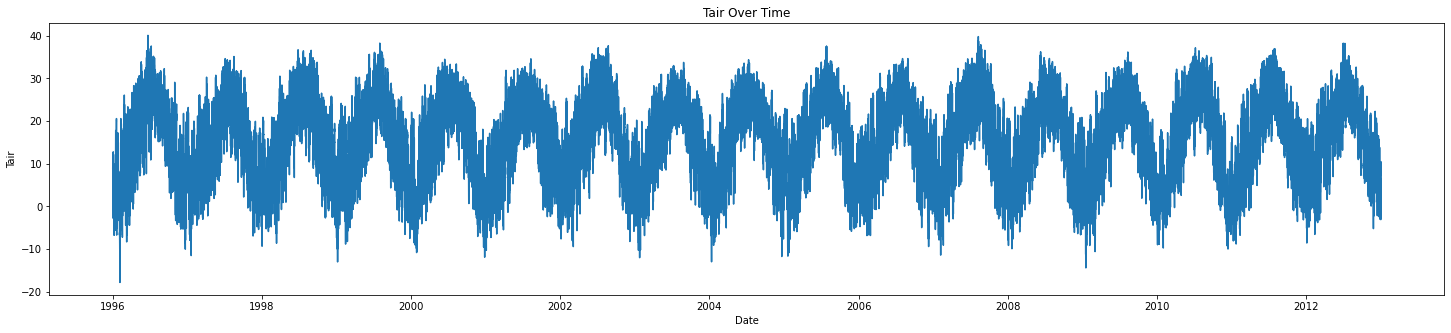

In [263]:
for k in keys_vars:
     # Set the figure size
    plt.figure(figsize=(25, 5))

    # Create the line plot
    plt.plot(df_all_vars_30m['Date'], df_all_vars_30m[k])

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel(k)
    plt.title(f'{k} Over Time')


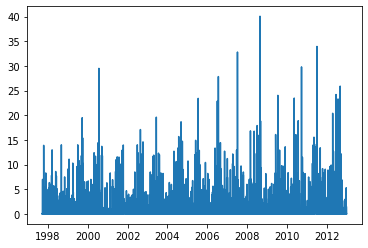

In [264]:
k='Rainf'
plt.plot(df_all_vars_30m['Date'][30000:], df_all_vars_30m[k][30000:])

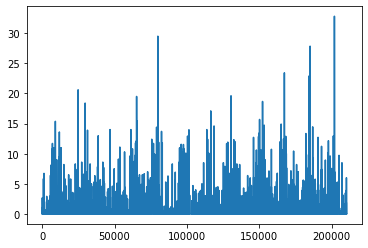

In [265]:
plt.plot(np.asarray(df_FACEMDS ['h'].Rainf[1:], dtype='float')*30*60
        )

In [278]:
import pickle
# Saving the dictionary of the Start Date of Duke Dataset

fname_start_dates = f"{paths['Save_Processed']}start_dates_Oren.pkl"
# Save the dictionary to a file
with open(fname_start_dates, 'wb') as file:
    pickle.dump(First_Available_date, file)
